In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
QB = pd.read_csv('QB/QB.csv')
QB.describe()

,Rank,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,165.930723,4.909639,18.602410,28.692771,57.966867,214.891566,6.822590,1.409639,0.683735,82.856657,2.894578,12.256024,3.460843,0.111446,16.207530,16.207410
std,95.201034,2.578841,10.284109,15.332041,23.836545,123.601226,3.840396,1.296392,0.906159,39.758867,2.523192,15.510764,4.218464,0.351417,10.929689,10.928664
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,-3.000000,0.000000,-0.900000,-0.940000
25%,83.750000,3.000000,14.000000,22.000000,54.500000,149.750000,5.475000,0.000000,0.000000,63.207500,1.000000,0.000000,0.000000,0.000000,8.200000,8.220000
50%,166.500000,5.000000,21.000000,32.000000,63.250000,237.500000,7.050000,1.000000,0.000000,89.865000,2.000000,7.000000,2.950000,0.000000,16.350000,16.340000
75%,249.250000,7.000000,25.000000,39.000000,71.825000,301.000000,8.500000,2.000000,1.000000,109.697500,4.000000,19.000000,5.500000,0.000000,23.725000,23.690000
max,332.000000,9.000000,40.000000,62.000000,100.000000,465.000000,44.000000,6.000000,4.000000,158.330000,13.000000,82.000000,33.000000,2.000000,46.500000,46.460000


In [3]:
QB = QB.set_index(['Name', 'Team'])
QB.head()

,,Rank,Position,Week,Opponent,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,,,
Mitch Trubisky,CHI,1,QB,4,TB,19,26,73.1,354,13.6,6,0,154.65,3,53,17.7,0,46.5,46.46
Ryan Fitzpatrick,TB,2,QB,1,NO,21,28,75.0,417,14.9,4,0,156.25,12,36,3.0,1,45.3,45.28
Drew Brees,NO,3,QB,3,ATL,39,49,79.6,396,8.1,3,0,120.75,3,7,2.3,2,43.5,43.54
Matt Ryan,ATL,4,QB,3,NO,26,35,74.3,374,10.7,5,0,148.10,4,12,3.0,0,43.2,43.16
Jared Goff,LAR,5,QB,4,MIN,26,33,78.8,465,14.1,5,0,158.33,2,7,3.5,0,42.3,42.30


In [4]:
QBscore = pd.DataFrame()
QBscore = QB.query('Week == 2')
QB2 = QB[QB.Week < 2]
QB2 = QB2.groupby(['Name', 'Team']).mean()
QB2 = QB2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw2 = pd.DataFrame()
QBw2['Opponent'] = QBscore.Opponent
QBw2['Score'] = QBscore.FantasyPointsDraftKings
QBw2['Week'] = QBscore.Week
QBw2 = QBw2.join(QB2)
QBw2 = QBw2.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 3')
QB3 = QB[QB.Week < 3]
QB3 = QB3.groupby(['Name', 'Team']).mean()
QB3 = QB3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw3 = pd.DataFrame()
QBw3['Opponent'] = QBscore.Opponent
QBw3['Score'] = QBscore.FantasyPointsDraftKings
QBw3['Week'] = QBscore.Week
QBw3 = QBw3.join(QB3)
QBw3 = QBw3.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 4')
QB4 = QB[QB.Week < 4]
QB4 = QB4.groupby(['Name', 'Team']).mean()
QB4 = QB4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw4 = pd.DataFrame()
QBw4['Opponent'] = QBscore.Opponent
QBw4['Score'] = QBscore.FantasyPointsDraftKings
QBw4['Week'] = QBscore.Week
QBw4 = QBw4.join(QB4)
QBw4 = QBw4.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 5')
QB5 = QB[QB.Week < 5]
QB5 = QB5.groupby(['Name', 'Team']).mean()
QB5 = QB5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw5 = pd.DataFrame()
QBw5['Opponent'] = QBscore.Opponent
QBw5['Score'] = QBscore.FantasyPointsDraftKings
QBw5['Week'] = QBscore.Week
QBw5 = QBw5.join(QB5)
QBw5 = QBw5.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 6')
QB6 = QB[QB.Week < 6]
QB6 = QB6.groupby(['Name', 'Team']).mean()
QB6 = QB6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw6 = pd.DataFrame()
QBw6['Opponent'] = QBscore.Opponent
QBw6['Score'] = QBscore.FantasyPointsDraftKings
QBw6['Week'] = QBscore.Week
QBw6 = QBw6.join(QB6)
QBw6 = QBw6.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 7')
QB7 = QB[QB.Week < 7]
QB7 = QB7.groupby(['Name', 'Team']).mean()
QB7 = QB7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw7 = pd.DataFrame()
QBw7['Opponent'] = QBscore.Opponent
QBw7['Score'] = QBscore.FantasyPointsDraftKings
QBw7['Week'] = QBscore.Week
QBw7 = QBw7.join(QB7)
QBw7 = QBw7.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 8')
QB8 = QB[QB.Week < 8]
QB8 = QB8.groupby(['Name', 'Team']).mean()
QB8 = QB8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw8 = pd.DataFrame()
QBw8['Opponent'] = QBscore.Opponent
QBw8['Score'] = QBscore.FantasyPointsDraftKings
QBw8['Week'] = QBscore.Week
QBw8 = QBw8.join(QB8)
QBw8 = QBw8.reset_index()

QBscore = pd.DataFrame()
QBscore = QB.query('Week == 9')
QB9 = QB[QB.Week < 9]
QB9 = QB9.groupby(['Name', 'Team']).mean()
QB9 = QB9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBw9 = pd.DataFrame()
QBw9['Opponent'] = QBscore.Opponent
QBw9['Score'] = QBscore.FantasyPointsDraftKings
QBw9['Week'] = QBscore.Week
QBw9 = QBw9.join(QB9)
QBw9 = QBw9.reset_index()



In [5]:
QBws = QBw2.append(QBw3, ignore_index=True, sort=False).append(QBw4, ignore_index=True, sort=False)\
.append(QBw5, ignore_index=True, sort=False).append(QBw6, ignore_index=True, sort=False)\
.append(QBw7, ignore_index=True, sort=False).append(QBw8, ignore_index=True, sort=False)\
.append(QBw9, ignore_index=True, sort=False)

In [6]:
QBws.describe()

,Score,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings
count,293.000000,293.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,16.386075,5.430034,19.613558,30.185617,57.259081,225.479008,6.638472,1.474189,0.773302,81.439584,3.018078,12.860123,3.505800,0.115825,16.976915
std,10.968640,2.285913,9.142598,13.200521,21.208302,106.587640,2.635682,1.010742,0.651043,33.963803,2.187799,13.285908,2.832034,0.210277,8.925693
min,-0.400000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,0.000000,-0.900000
25%,8.300000,3.000000,17.000000,27.125000,57.525000,177.583333,6.162500,0.666667,0.285714,71.247500,1.500000,3.000000,1.352500,0.000000,12.685000
50%,16.640000,5.000000,21.875000,34.000000,64.358333,255.583333,7.258929,1.500000,0.750000,90.064167,2.535714,8.583333,3.200000,0.000000,18.266667
75%,24.240000,7.000000,25.550000,38.191667,68.600000,298.916667,7.962500,2.142857,1.000000,102.184500,4.250000,16.750000,5.341667,0.166667,23.102381
max,46.460000,9.000000,39.000000,53.000000,82.200000,439.000000,14.900000,5.000000,4.000000,156.250000,13.000000,77.000000,15.000000,1.000000,45.300000


In [7]:
QBws = QBws.dropna().drop_duplicates()
QBws.describe()

,Score,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,17.500815,5.451852,19.613558,30.185617,57.259081,225.479008,6.638472,1.474189,0.773302,81.439584,3.018078,12.860123,3.505800,0.115825,16.976915
std,10.581139,2.293416,9.142598,13.200521,21.208302,106.587640,2.635682,1.010742,0.651043,33.963803,2.187799,13.285908,2.832034,0.210277,8.925693
min,-0.400000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,0.000000,-0.900000
25%,8.985000,3.000000,17.000000,27.125000,57.525000,177.583333,6.162500,0.666667,0.285714,71.247500,1.500000,3.000000,1.352500,0.000000,12.685000
50%,17.370000,5.000000,21.875000,34.000000,64.358333,255.583333,7.258929,1.500000,0.750000,90.064167,2.535714,8.583333,3.200000,0.000000,18.266667
75%,24.705000,7.000000,25.550000,38.191667,68.600000,298.916667,7.962500,2.142857,1.000000,102.184500,4.250000,16.750000,5.341667,0.166667,23.102381
max,46.460000,9.000000,39.000000,53.000000,82.200000,439.000000,14.900000,5.000000,4.000000,156.250000,13.000000,77.000000,15.000000,1.000000,45.300000


In [8]:
QBavg = pd.DataFrame()

QBavg['Name'] = QBws['Name']
QBavg['Team'] = QBws['Team']
QBavg['Week'] = QBws['Week']
QBavg['Opponent'] = QBws['Opponent']
QBavg['CompletionsGame'] = QBws['PassingCompletions']
QBavg['AttemptsGame'] = QBws['PassingAttempts']
QBavg['PassingCompletionPercentage'] = QBws['PassingCompletionPercentage']
QBavg['YardsGame'] = QBws['PassingYards']
QBavg['PassingYardsPerAttempt'] = QBws['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QBws['PassingTouchdowns']
QBavg['InterceptionsGame'] = QBws['PassingInterceptions']
QBavg['PassingRating'] = QBws['PassingRating']
QBavg['RushingAttemptsGame'] = QBws['RushingAttempts']
QBavg['RushingYardsGame'] = QBws['RushingYards']
QBavg['RushingYardsPerAttempt'] = QBws['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QBws['RushingTouchdowns']
QBavg['PointsGame'] = QBws['FantasyPointsPerGameDraftKings']
QBavg['Score'] = QBws['Score']

In [9]:
QBavg.describe()

,Week,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame,Score
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5.451852,19.613558,30.185617,57.259081,225.479008,6.638472,1.474189,0.773302,81.439584,3.018078,12.860123,3.505800,0.115825,16.976915,17.500815
std,2.293416,9.142598,13.200521,21.208302,106.587640,2.635682,1.010742,0.651043,33.963803,2.187799,13.285908,2.832034,0.210277,8.925693,10.581139
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,0.000000,-0.900000,-0.400000
25%,3.000000,17.000000,27.125000,57.525000,177.583333,6.162500,0.666667,0.285714,71.247500,1.500000,3.000000,1.352500,0.000000,12.685000,8.985000
50%,5.000000,21.875000,34.000000,64.358333,255.583333,7.258929,1.500000,0.750000,90.064167,2.535714,8.583333,3.200000,0.000000,18.266667,17.370000
75%,7.000000,25.550000,38.191667,68.600000,298.916667,7.962500,2.142857,1.000000,102.184500,4.250000,16.750000,5.341667,0.166667,23.102381,24.705000
max,9.000000,39.000000,53.000000,82.200000,439.000000,14.900000,5.000000,4.000000,156.250000,13.000000,77.000000,15.000000,1.000000,45.300000,46.460000


In [10]:
QBRZ = pd.read_csv('QB/QBRZ.csv')
QBRZ.head()

,Rank,Name,Team,Position,Week,Opponent,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
0,1,Drew Brees,NO,QB,3,ATL,12,13,92.3,65,5.0,3,0,127.08,2,8,4.0,2,27.4,27.40
1,2,Matt Ryan,ATL,QB,3,NO,6,6,100.0,53,8.8,4,0,143.06,0,0,0.0,0,22.1,22.12
2,3,Matt Ryan,ATL,QB,2,CAR,3,3,100.0,27,9.0,2,0,143.75,2,9,4.5,2,22.0,21.98
3,4,Mitch Trubisky,CHI,QB,4,TB,5,7,71.4,49,7.0,5,0,130.36,0,0,0.0,0,22.0,21.96
4,5,Andrew Luck,IND,QB,4,HOU,6,6,100.0,51,8.5,4,0,141.67,0,0,0.0,0,20.0,20.04


In [11]:
QBRZ.describe()

,Rank,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,159.117470,4.909639,2.171687,3.873494,46.371386,15.343373,3.533133,0.951807,0.093373,74.558675,0.548193,1.801205,1.254217,0.108434,5.319880,5.319759
std,87.523366,2.578841,1.953550,3.221288,34.608075,14.936407,3.719815,1.015334,0.301584,50.609449,0.900200,4.144257,2.691928,0.348048,5.360736,5.360739
min,1.000000,1.000000,0.000000,0.000000,0.000000,-2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-1.500000,0.000000,-1.000000,-1.000000
25%,83.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.580000,0.000000,0.000000,0.000000,0.000000,0.175000,0.150000
50%,166.500000,5.000000,2.000000,3.000000,50.000000,14.000000,2.750000,1.000000,0.000000,85.420000,0.000000,0.000000,0.000000,0.000000,4.550000,4.520000
75%,249.250000,7.000000,3.000000,6.000000,71.400000,24.000000,5.200000,2.000000,0.000000,118.750000,1.000000,2.000000,1.500000,0.000000,9.000000,9.040000
max,331.000000,9.000000,12.000000,13.000000,100.000000,68.000000,20.000000,5.000000,2.000000,158.330000,5.000000,21.000000,20.000000,2.000000,27.400000,27.400000


In [12]:
QBRZ = QBRZ.set_index(['Name', 'Team'])
QBRZ.head()

Rank Position  Week Opponent  PassingCompletions  \
Name           Team                                                     
Drew Brees     NO       1       QB     3      ATL                  12   
Matt Ryan      ATL      2       QB     3       NO                   6   
               ATL      3       QB     2      CAR                   3   
Mitch Trubisky CHI      4       QB     4       TB                   5   
Andrew Luck    IND      5       QB     4      HOU                   6   

                     PassingAttempts  PassingCompletionPercentage  \
Name           Team                                                 
Drew Brees     NO                 13                         92.3   
Matt Ryan      ATL                 6                        100.0   
               ATL                 3                        100.0   
Mitch Trubisky CHI                 7                         71.4   
Andrew Luck    IND                 6                        100.0   

                     PassingYards  PassingYardsPerAttempt  PassingTouchdowns  \
Name           Team                                                            
Drew Brees     NO              65                     5.0                  3   
Matt Ryan      ATL             53                     8.8                  4   
               ATL             27                     9.0                  2   
Mitch Trubisky CHI             49                     7.0                  5   
Andrew Luck    IND             51                     8.5                  4   

                     PassingInterceptions  PassingRating  RushingAttempts  \
Name           Team                                                         
Drew Brees     NO                       0         127.08                2   
Matt Ryan      ATL                      0         143.06                0   
               ATL                      0         143.75                2   
Mitch Trubisky CHI                      0         130.36                0   
Andrew Luck    IND                      0         141.67                0   

                     RushingYards  RushingYardsPerAttempt  RushingTouchdowns  \
Name           Team                                                            
Drew Brees     NO               8                     4.0                  2   
Matt Ryan      ATL              0                     0.0                  0   
               ATL              9                     4.5                  2   
Mitch Trubisky CHI              0                     0.0                  0   
Andrew Luck    IND              0                     0.0                  0   

                     FantasyPointsPerGameDraftKings  FantasyPointsDraftKings  
Name           Team                                                           
Drew Brees     NO                              27.4                    27.40  
Matt Ryan      ATL                             22.1                    22.12  
               ATL                             22.0                    21.98  
Mitch Trubisky CHI                             22.0                    21.96  
Andrew Luck    IND                             20.0                    20.04

In [13]:
QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 2')
QBRZ2 = QBRZ[QBRZ.Week < 2]
QBRZ2 = QBRZ2.groupby(['Name', 'Team']).mean()
QBRZ2 = QBRZ2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw2 = pd.DataFrame()
QBRZw2['Opponent'] = QBRZscore.Opponent
QBRZw2['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw2['Week'] = QBRZscore.Week
QBRZw2 = QBRZw2.join(QBRZ2)
QBRZw2 = QBRZw2.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 3')
QBRZ3 = QBRZ[QBRZ.Week < 3]
QBRZ3 = QBRZ3.groupby(['Name', 'Team']).mean()
QBRZ3 = QBRZ3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw3 = pd.DataFrame()
QBRZw3['Opponent'] = QBRZscore.Opponent
QBRZw3['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw3['Week'] = QBRZscore.Week
QBRZw3 = QBRZw3.join(QBRZ3)
QBRZw3 = QBRZw3.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 4')
QBRZ4 = QBRZ[QBRZ.Week < 4]
QBRZ4 = QBRZ4.groupby(['Name', 'Team']).mean()
QBRZ4 = QBRZ4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw4 = pd.DataFrame()
QBRZw4['Opponent'] = QBRZscore.Opponent
QBRZw4['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw4['Week'] = QBRZscore.Week
QBRZw4 = QBRZw4.join(QBRZ4)
QBRZw4 = QBRZw4.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 5')
QBRZ5 = QBRZ[QBRZ.Week < 5]
QBRZ5 = QBRZ5.groupby(['Name', 'Team']).mean()
QBRZ5 = QBRZ5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw5 = pd.DataFrame()
QBRZw5['Opponent'] = QBRZscore.Opponent
QBRZw5['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw5['Week'] = QBRZscore.Week
QBRZw5 = QBRZw5.join(QBRZ5)
QBRZw5 = QBRZw5.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 6')
QBRZ6 = QBRZ[QBRZ.Week < 6]
QBRZ6 = QBRZ6.groupby(['Name', 'Team']).mean()
QBRZ6 = QBRZ6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw6 = pd.DataFrame()
QBRZw6['Opponent'] = QBRZscore.Opponent
QBRZw6['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw6['Week'] = QBRZscore.Week
QBRZw6 = QBRZw6.join(QBRZ6)
QBRZw6 = QBRZw6.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 7')
QBRZ7 = QBRZ[QBRZ.Week < 7]
QBRZ7 = QBRZ7.groupby(['Name', 'Team']).mean()
QBRZ7 = QBRZ7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw7 = pd.DataFrame()
QBRZw7['Opponent'] = QBRZscore.Opponent
QBRZw7['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw7['Week'] = QBRZscore.Week
QBRZw7 = QBRZw7.join(QBRZ7)
QBRZw7 = QBRZw7.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 8')
QBRZ8 = QBRZ[QBRZ.Week < 8]
QBRZ8 = QBRZ8.groupby(['Name', 'Team']).mean()
QBRZ8 = QBRZ8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw8 = pd.DataFrame()
QBRZw8['Opponent'] = QBRZscore.Opponent
QBRZw8['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw8['Week'] = QBRZscore.Week
QBRZw8 = QBRZw8.join(QBRZ8)
QBRZw8 = QBRZw8.reset_index()

QBRZscore = pd.DataFrame()
QBRZscore = QBRZ.query('Week == 9')
QBRZ9 = QBRZ[QBRZ.Week < 9]
QBRZ9 = QBRZ9.groupby(['Name', 'Team']).mean()
QBRZ9 = QBRZ9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBRZw9 = pd.DataFrame()
QBRZw9['Opponent'] = QBRZscore.Opponent
QBRZw9['Score'] = QBRZscore.FantasyPointsDraftKings
QBRZw9['Week'] = QBRZscore.Week
QBRZw9 = QBRZw9.join(QBRZ9)
QBRZw9 = QBRZw9.reset_index()



In [14]:
QBRZws = QBRZw2.append(QBRZw3, ignore_index=True, sort=False).append(QBRZw4, ignore_index=True, sort=False)\
.append(QBRZw5, ignore_index=True, sort=False).append(QBRZw6, ignore_index=True, sort=False)\
.append(QBRZw7, ignore_index=True, sort=False).append(QBRZw8, ignore_index=True, sort=False)\
.append(QBRZw9, ignore_index=True, sort=False)

In [15]:
QBRZws.describe()

,Score,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings
count,293.00000,293.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5.44901,5.430034,2.332941,4.116539,48.832658,16.355838,3.600055,0.963188,0.102196,77.210068,0.592870,1.841799,1.319883,0.113937,5.464776
std,5.43395,2.285913,1.532468,2.468732,25.322934,11.676895,2.665575,0.737852,0.184622,38.742095,0.652837,3.116385,2.144370,0.210532,3.800907
min,-1.00000,2.000000,0.000000,0.000000,0.000000,-2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-1.500000,0.000000,-0.900000
25%,0.12000,3.000000,1.350000,2.666667,34.925000,7.125000,1.712500,0.333333,0.000000,56.250000,0.000000,0.000000,0.000000,0.000000,2.651786
50%,4.64000,5.000000,2.285714,4.250000,54.742857,16.000000,3.562500,1.000000,0.000000,89.068750,0.400000,0.666667,0.600000,0.000000,5.291667
75%,9.04000,7.000000,3.333333,5.968750,65.566667,23.702381,4.872500,1.500000,0.166667,105.151500,1.000000,2.625000,1.816667,0.166667,7.931250
max,27.40000,9.000000,7.666667,11.000000,100.000000,56.000000,16.000000,3.000000,1.000000,158.330000,4.000000,20.000000,20.000000,1.000000,16.133333


In [16]:
QBRZws = QBRZws.dropna().drop_duplicates()
QBRZws.describe()

,Score,Week,PassingCompletions,PassingAttempts,PassingCompletionPercentage,PassingYards,PassingYardsPerAttempt,PassingTouchdowns,PassingInterceptions,PassingRating,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,FantasyPointsPerGameDraftKings
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5.804667,5.451852,2.332941,4.116539,48.832658,16.355838,3.600055,0.963188,0.102196,77.210068,0.592870,1.841799,1.319883,0.113937,5.464776
std,5.473419,2.293416,1.532468,2.468732,25.322934,11.676895,2.665575,0.737852,0.184622,38.742095,0.652837,3.116385,2.144370,0.210532,3.800907
min,-1.000000,2.000000,0.000000,0.000000,0.000000,-2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-1.500000,0.000000,-0.900000
25%,0.385000,3.000000,1.350000,2.666667,34.925000,7.125000,1.712500,0.333333,0.000000,56.250000,0.000000,0.000000,0.000000,0.000000,2.651786
50%,4.720000,5.000000,2.285714,4.250000,54.742857,16.000000,3.562500,1.000000,0.000000,89.068750,0.400000,0.666667,0.600000,0.000000,5.291667
75%,9.150000,7.000000,3.333333,5.968750,65.566667,23.702381,4.872500,1.500000,0.166667,105.151500,1.000000,2.625000,1.816667,0.166667,7.931250
max,27.400000,9.000000,7.666667,11.000000,100.000000,56.000000,16.000000,3.000000,1.000000,158.330000,4.000000,20.000000,20.000000,1.000000,16.133333


In [17]:
QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZws['Name']
QBRZavg['RZCompletionsGame'] = QBRZws['PassingCompletions']
QBRZavg['Week'] = QBRZws['Week']
QBRZavg['RZAttemptsGame'] = QBRZws['PassingAttempts']
QBRZavg['RZPassingCompletionPercentage'] = QBRZws['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZws['PassingYards']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZws['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZws['PassingTouchdowns']
QBRZavg['RZInterceptionsGame'] = QBRZws['PassingInterceptions']
QBRZavg['RZPassingRating'] = QBRZws['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZws['RushingAttempts']
QBRZavg['RZRushingYardsGame'] = QBRZws['RushingYards']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZws['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZws['RushingTouchdowns']
QBRZavg['RZPointsGame'] = QBRZws['FantasyPointsPerGameDraftKings']

In [18]:
QBRZavg.describe()

,RZCompletionsGame,Week,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.332941,5.451852,4.116539,48.832658,16.355838,3.600055,0.963188,0.102196,77.210068,0.592870,1.841799,1.319883,0.113937,5.464776
std,1.532468,2.293416,2.468732,25.322934,11.676895,2.665575,0.737852,0.184622,38.742095,0.652837,3.116385,2.144370,0.210532,3.800907
min,0.000000,2.000000,0.000000,0.000000,-2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-1.500000,0.000000,-0.900000
25%,1.350000,3.000000,2.666667,34.925000,7.125000,1.712500,0.333333,0.000000,56.250000,0.000000,0.000000,0.000000,0.000000,2.651786
50%,2.285714,5.000000,4.250000,54.742857,16.000000,3.562500,1.000000,0.000000,89.068750,0.400000,0.666667,0.600000,0.000000,5.291667
75%,3.333333,7.000000,5.968750,65.566667,23.702381,4.872500,1.500000,0.166667,105.151500,1.000000,2.625000,1.816667,0.166667,7.931250
max,7.666667,9.000000,11.000000,100.000000,56.000000,16.000000,3.000000,1.000000,158.330000,4.000000,20.000000,20.000000,1.000000,16.133333


In [19]:
QBsnaps = pd.read_csv('QB/QBsnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Week,Opponent,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Lamar Jackson,BAL,QB,7,NO,5,7.4,60.0,0.0,80.0,80.0,7.10,142.0
1,2,Lamar Jackson,BAL,QB,6,TEN,2,2.7,50.0,0.0,50.0,50.0,2.20,110.0
2,3,Joshua Dobbs,PIT,QB,9,BAL,1,1.2,0.0,0.0,100.0,100.0,0.88,88.0
3,4,Ryan Fitzpatrick,TB,QB,8,CIN,25,28.4,4.0,0.0,64.0,64.0,19.56,78.2
4,5,Taysom Hill,NO,QB,3,ATL,5,6.3,60.0,0.0,60.0,60.0,3.90,78.0


In [20]:
QBsnaps = QBsnaps.set_index(['Name', 'Team'])
QBsnaps.head()

Rank Position  Week Opponent  SnapsPlayed  \
Name             Team                                              
Lamar Jackson    BAL      1       QB     7       NO            5   
                 BAL      2       QB     6      TEN            2   
Joshua Dobbs     PIT      3       QB     9      BAL            1   
Ryan Fitzpatrick TB       4       QB     8      CIN           25   
Taysom Hill      NO       5       QB     3      ATL            5   

                       SnapsPlayedPercentage  RushSnapPercentage  \
Name             Team                                              
Lamar Jackson    BAL                     7.4                60.0   
                 BAL                     2.7                50.0   
Joshua Dobbs     PIT                     1.2                 0.0   
Ryan Fitzpatrick TB                     28.4                 4.0   
Taysom Hill      NO                      6.3                60.0   

                       TargetSnapPercentage  TouchSnapPercentage  \
Name             Team                                              
Lamar Jackson    BAL                    0.0                 80.0   
                 BAL                    0.0                 50.0   
Joshua Dobbs     PIT                    0.0                100.0   
Ryan Fitzpatrick TB                     0.0                 64.0   
Taysom Hill      NO                     0.0                 60.0   

                       IntendedTouchSnapPercentage  FantasyPointsDraftKings  \
Name             Team                                                         
Lamar Jackson    BAL                          80.0                     7.10   
                 BAL                          50.0                     2.20   
Joshua Dobbs     PIT                         100.0                     0.88   
Ryan Fitzpatrick TB                           64.0                    19.56   
Taysom Hill      NO                           60.0                     3.90   

                       FantasyPointSnapPercentageDraftKings  
Name             Team                                        
Lamar Jackson    BAL                                  142.0  
                 BAL                                  110.0  
Joshua Dobbs     PIT                                   88.0  
Ryan Fitzpatrick TB                                    78.2  
Taysom Hill      NO                                    78.0

In [21]:
QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 2')
QBsnaps2 = QBsnaps[QBsnaps.Week < 2]
QBsnaps2 = QBsnaps2.groupby(['Name', 'Team']).mean()
QBsnaps2 = QBsnaps2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw2 = pd.DataFrame()
QBsnapsw2['Opponent'] = QBsnapsscore.Opponent
QBsnapsw2['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw2['Week'] = QBsnapsscore.Week
QBsnapsw2 = QBsnapsw2.join(QBsnaps2)
QBsnapsw2 = QBsnapsw2.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 3')
QBsnaps3 = QBsnaps[QBsnaps.Week < 3]
QBsnaps3 = QBsnaps3.groupby(['Name', 'Team']).mean()
QBsnaps3 = QBsnaps3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw3 = pd.DataFrame()
QBsnapsw3['Opponent'] = QBsnapsscore.Opponent
QBsnapsw3['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw3['Week'] = QBsnapsscore.Week
QBsnapsw3 = QBsnapsw3.join(QBsnaps3)
QBsnapsw3 = QBsnapsw3.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 4')
QBsnaps4 = QBsnaps[QBsnaps.Week < 4]
QBsnaps4 = QBsnaps4.groupby(['Name', 'Team']).mean()
QBsnaps4 = QBsnaps4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw4 = pd.DataFrame()
QBsnapsw4['Opponent'] = QBsnapsscore.Opponent
QBsnapsw4['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw4['Week'] = QBsnapsscore.Week
QBsnapsw4 = QBsnapsw4.join(QBsnaps4)
QBsnapsw4 = QBsnapsw4.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 5')
QBsnaps5 = QBsnaps[QBsnaps.Week < 5]
QBsnaps5 = QBsnaps5.groupby(['Name', 'Team']).mean()
QBsnaps5 = QBsnaps5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw5 = pd.DataFrame()
QBsnapsw5['Opponent'] = QBsnapsscore.Opponent
QBsnapsw5['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw5['Week'] = QBsnapsscore.Week
QBsnapsw5 = QBsnapsw5.join(QBsnaps5)
QBsnapsw5 = QBsnapsw5.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 6')
QBsnaps6 = QBsnaps[QBsnaps.Week < 6]
QBsnaps6 = QBsnaps6.groupby(['Name', 'Team']).mean()
QBsnaps6 = QBsnaps6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw6 = pd.DataFrame()
QBsnapsw6['Opponent'] = QBsnapsscore.Opponent
QBsnapsw6['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw6['Week'] = QBsnapsscore.Week
QBsnapsw6 = QBsnapsw6.join(QBsnaps6)
QBsnapsw6 = QBsnapsw6.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 7')
QBsnaps7 = QBsnaps[QBsnaps.Week < 7]
QBsnaps7 = QBsnaps7.groupby(['Name', 'Team']).mean()
QBsnaps7 = QBsnaps7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw7 = pd.DataFrame()
QBsnapsw7['Opponent'] = QBsnapsscore.Opponent
QBsnapsw7['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw7['Week'] = QBsnapsscore.Week
QBsnapsw7 = QBsnapsw7.join(QBsnaps7)
QBsnapsw7 = QBsnapsw7.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 8')
QBsnaps8 = QBsnaps[QBsnaps.Week < 8]
QBsnaps8 = QBsnaps8.groupby(['Name', 'Team']).mean()
QBsnaps8 = QBsnaps8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw8 = pd.DataFrame()
QBsnapsw8['Opponent'] = QBsnapsscore.Opponent
QBsnapsw8['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw8['Week'] = QBsnapsscore.Week
QBsnapsw8 = QBsnapsw8.join(QBsnaps8)
QBsnapsw8 = QBsnapsw8.reset_index()

QBsnapsscore = pd.DataFrame()
QBsnapsscore = QBsnaps.query('Week == 9')
QBsnaps9 = QBsnaps[QBsnaps.Week < 9]
QBsnaps9 = QBsnaps9.groupby(['Name', 'Team']).mean()
QBsnaps9 = QBsnaps9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
QBsnapsw9 = pd.DataFrame()
QBsnapsw9['Opponent'] = QBsnapsscore.Opponent
QBsnapsw9['Score'] = QBsnapsscore.FantasyPointsDraftKings
QBsnapsw9['Week'] = QBsnapsscore.Week
QBsnapsw9 = QBsnapsw9.join(QBsnaps9)
QBsnapsw9 = QBsnapsw9.reset_index()



In [22]:
QBsnapsws = QBsnapsw2.append(QBsnapsw3, ignore_index=True, sort=False).append(QBsnapsw4, ignore_index=True, sort=False)\
.append(QBsnapsw5, ignore_index=True, sort=False).append(QBsnapsw6, ignore_index=True, sort=False)\
.append(QBsnapsw7, ignore_index=True, sort=False).append(QBsnapsw8, ignore_index=True, sort=False)\
.append(QBsnapsw9, ignore_index=True, sort=False)

In [23]:
QBsnapsws.describe()

,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,293.000000,293.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,16.386075,5.430034,56.746292,83.324228,8.278504,0.259402,55.655129,55.880658,26.847364
std,10.968640,2.285913,22.040332,31.407146,15.116695,1.597777,15.422161,15.188495,13.508475
min,-0.400000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.000000
25%,8.300000,3.000000,54.762500,85.425000,2.687500,0.000000,53.731250,53.796875,21.410000
50%,16.640000,5.000000,65.464286,99.698333,4.162500,0.000000,57.300000,57.300000,27.828571
75%,24.240000,7.000000,69.553571,100.000000,7.795000,0.000000,62.396875,62.396875,34.750000
max,46.460000,9.000000,89.000000,100.000000,100.000000,16.666667,100.000000,100.000000,68.600000


In [24]:
QBsnapsws = QBsnapsws.dropna().drop_duplicates()

In [25]:
QBsnapsws.head()

,Name,Team,Opponent,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
0,Patrick Mahomes,KC,PIT,41.84,2,56.0,100.0,8.9,0.0,57.1,57.1,50.6
1,Ryan Fitzpatrick,TB,PHI,33.98,2,66.0,100.0,18.2,0.0,60.6,60.6,68.6
2,Matt Ryan,ATL,CAR,31.68,2,70.0,100.0,2.9,0.0,64.3,64.3,14.1
3,Ben Roethlisberger,PIT,KC,41.98,2,84.0,100.0,3.6,0.0,52.4,52.4,20.2
4,Kirk Cousins,MIN,GB,37.50,2,71.0,100.0,5.6,0.0,56.3,56.3,28.7


In [26]:
QBsnaps = QBsnapsws.drop(['Team', 'Opponent', 'Score', 'FantasyPointSnapPercentageDraftKings'], axis=1)

In [27]:
QBsnaps.head()

,Name,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage
0,Patrick Mahomes,2,56.0,100.0,8.9,0.0,57.1,57.1
1,Ryan Fitzpatrick,2,66.0,100.0,18.2,0.0,60.6,60.6
2,Matt Ryan,2,70.0,100.0,2.9,0.0,64.3,64.3
3,Ben Roethlisberger,2,84.0,100.0,3.6,0.0,52.4,52.4
4,Kirk Cousins,2,71.0,100.0,5.6,0.0,56.3,56.3


In [28]:
Defense = pd.read_csv('Defense/Defense.csv')
Defense = Defense.drop(['Name', 'Rank', 'Position', 'DraftKingsFantasyPointsAllowedAverage', \
                       'DraftKingsKickerFantasyPointsAllowedAverage'], axis=1)
Defense.head()

,Team,Week,Opponent,DraftKingsQuarterbackFantasyPointsAllowedAverage,DraftKingsRunningbackFantasyPointsAllowedAverage,DraftKingsWideReceiverFantasyPointsAllowedAverage,DraftKingsTightEndFantasyPointsAllowedAverage
0,BAL,1,BUF,4.62,6.5,12.7,7.2
1,BAL,6,TEN,7.18,7.0,11.0,6.7
2,LAR,2,ARI,2.60,13.2,12.5,5.7
3,GB,4,BUF,4.94,8.2,15.0,11.8
4,JAX,3,TEN,9.42,12.7,17.0,4.0


In [29]:
Defense2 = Defense[Defense.Week < 2]
Defense2 = Defense2.groupby('Team').mean()
Defense2 = Defense2.drop('Week', axis = 1)
Defense2 = Defense2.reset_index()
QBd2 = pd.DataFrame()
QBd2['Opponent'] = Defense2['Team']
QBd2['Week'] = 2
QBd2['DPointsAllowed'] = Defense2.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense3 = Defense[Defense.Week < 3]
Defense3 = Defense3.groupby('Team').mean()
Defense3 = Defense3.drop('Week', axis = 1)
Defense3 = Defense3.reset_index()
QBd3 = pd.DataFrame()
QBd3['Opponent'] = Defense3['Team']
QBd3['Week'] = 3
QBd3['DPointsAllowed'] = Defense3.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense4 = Defense[Defense.Week < 4]
Defense4 = Defense4.groupby('Team').mean()
Defense4 = Defense4.drop('Week', axis = 1)
Defense4 = Defense4.reset_index()
QBd4 = pd.DataFrame()
QBd4['Opponent'] = Defense4['Team']
QBd4['Week'] = 4
QBd4['DPointsAllowed'] = Defense4.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense5 = Defense[Defense.Week < 5]
Defense5 = Defense5.groupby('Team').mean()
Defense5 = Defense5.drop('Week', axis = 1)
Defense5 = Defense5.reset_index()
QBd5 = pd.DataFrame()
QBd5['Opponent'] = Defense5['Team']
QBd5['Week'] = 5
QBd5['DPointsAllowed'] = Defense5.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense6 = Defense[Defense.Week < 6]
Defense6 = Defense6.groupby('Team').mean()
Defense6 = Defense6.drop('Week', axis = 1)
Defense6 = Defense6.reset_index()
QBd6 = pd.DataFrame()
QBd6['Opponent'] = Defense6['Team']
QBd6['Week'] = 6
QBd6['DPointsAllowed'] = Defense6.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense7 = Defense[Defense.Week < 7]
Defense7 = Defense7.groupby('Team').mean()
Defense7 = Defense7.drop('Week', axis = 1)
Defense7 = Defense7.reset_index()
QBd7 = pd.DataFrame()
QBd7['Opponent'] = Defense7['Team']
QBd7['Week'] = 7
QBd7['DPointsAllowed'] = Defense7.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense8 = Defense[Defense.Week < 8]
Defense8 = Defense8.groupby('Team').mean()
Defense8 = Defense8.drop('Week', axis = 1)
Defense8 = Defense8.reset_index()
QBd8 = pd.DataFrame()
QBd8['Opponent'] = Defense8['Team']
QBd8['Week'] = 8
QBd8['DPointsAllowed'] = Defense8.DraftKingsQuarterbackFantasyPointsAllowedAverage

Defense9 = Defense[Defense.Week < 9]
Defense9 = Defense9.groupby('Team').mean()
Defense9 = Defense9.drop('Week', axis = 1)
Defense9 = Defense9.reset_index()
QBd9 = pd.DataFrame()
QBd9['Opponent'] = Defense9['Team']
QBd9['Week'] = 9
QBd9['DPointsAllowed'] = Defense9.DraftKingsQuarterbackFantasyPointsAllowedAverage



In [30]:
QBds = QBd2.append(QBd3, ignore_index=True, sort=False).append(QBd4, ignore_index=True, sort=False)\
.append(QBd5, ignore_index=True, sort=False).append(QBd6, ignore_index=True, sort=False)\
.append(QBd7, ignore_index=True, sort=False).append(QBd8, ignore_index=True, sort=False)\
.append(QBd9, ignore_index=True, sort=False)

In [31]:
QBds.head()

,Opponent,Week,DPointsAllowed
0,ARI,2,19.60
1,ATL,2,6.08
2,BAL,2,4.62
3,BUF,2,26.60
4,CAR,2,9.70


In [32]:
QBds.describe()

,Week,DPointsAllowed
count,256.000000,256.000000
mean,5.500000,19.994253
std,2.295776,5.704753
min,2.000000,4.620000
25%,3.750000,16.790625
50%,5.500000,19.213333
75%,7.250000,22.869375
max,9.000000,45.280000


In [33]:
QBavg = QBavg.set_index(['Name', 'Week'])
QBRZavg = QBRZavg.set_index(['Name', 'Week'])
QBs = QBavg.join(QBRZavg, lsuffix='avg', rsuffix='rzavg')
QBs = QBs.drop_duplicates().dropna()
QBs.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,19.613558,30.185617,57.259081,225.479008,6.638472,1.474189,0.773302,81.439584,3.018078,12.860123,...,16.355838,3.600055,0.963188,0.102196,77.210068,0.592870,1.841799,1.319883,0.113937,5.464776
std,9.142598,13.200521,21.208302,106.587640,2.635682,1.010742,0.651043,33.963803,2.187799,13.285908,...,11.676895,2.665575,0.737852,0.184622,38.742095,0.652837,3.116385,2.144370,0.210532,3.800907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,...,-2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-1.500000,0.000000,-0.900000
25%,17.000000,27.125000,57.525000,177.583333,6.162500,0.666667,0.285714,71.247500,1.500000,3.000000,...,7.125000,1.712500,0.333333,0.000000,56.250000,0.000000,0.000000,0.000000,0.000000,2.651786
50%,21.875000,34.000000,64.358333,255.583333,7.258929,1.500000,0.750000,90.064167,2.535714,8.583333,...,16.000000,3.562500,1.000000,0.000000,89.068750,0.400000,0.666667,0.600000,0.000000,5.291667
75%,25.550000,38.191667,68.600000,298.916667,7.962500,2.142857,1.000000,102.184500,4.250000,16.750000,...,23.702381,4.872500,1.500000,0.166667,105.151500,1.000000,2.625000,1.816667,0.166667,7.931250
max,39.000000,53.000000,82.200000,439.000000,14.900000,5.000000,4.000000,156.250000,13.000000,77.000000,...,56.000000,16.000000,3.000000,1.000000,158.330000,4.000000,20.000000,20.000000,1.000000,16.133333


In [34]:
QBsnaps = QBsnaps.set_index(['Name', 'Week'])
QBs = QBs.join(QBsnaps, lsuffix='avg', rsuffix='rzavg')
QBs = QBs.drop_duplicates().dropna()
QBs.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,19.613558,30.185617,57.259081,225.479008,6.638472,1.474189,0.773302,81.439584,3.018078,12.860123,...,1.841799,1.319883,0.113937,5.464776,56.746292,83.324228,8.278504,0.259402,55.655129,55.880658
std,9.142598,13.200521,21.208302,106.587640,2.635682,1.010742,0.651043,33.963803,2.187799,13.285908,...,3.116385,2.144370,0.210532,3.800907,22.040332,31.407146,15.116695,1.597777,15.422161,15.188495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,...,-6.000000,-1.500000,0.000000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,27.125000,57.525000,177.583333,6.162500,0.666667,0.285714,71.247500,1.500000,3.000000,...,0.000000,0.000000,0.000000,2.651786,54.762500,85.425000,2.687500,0.000000,53.731250,53.796875
50%,21.875000,34.000000,64.358333,255.583333,7.258929,1.500000,0.750000,90.064167,2.535714,8.583333,...,0.666667,0.600000,0.000000,5.291667,65.464286,99.698333,4.162500,0.000000,57.300000,57.300000
75%,25.550000,38.191667,68.600000,298.916667,7.962500,2.142857,1.000000,102.184500,4.250000,16.750000,...,2.625000,1.816667,0.166667,7.931250,69.553571,100.000000,7.795000,0.000000,62.396875,62.396875
max,39.000000,53.000000,82.200000,439.000000,14.900000,5.000000,4.000000,156.250000,13.000000,77.000000,...,20.000000,20.000000,1.000000,16.133333,89.000000,100.000000,100.000000,16.666667,100.000000,100.000000


In [35]:
QBs.columns

Index(['Team', 'Opponent', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayed',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage'],
      dtype='object')

In [36]:
QBs = QBs.reset_index()

In [37]:
QBtest = QBs.set_index(['Week', 'Opponent'])
QBdtest = QBds.set_index(['Week', 'Opponent'])
QBho = QBtest.join(QBdtest, lsuffix='norm', rsuffix='d')
QBho = QBho.reset_index()
QBhope = QBho.dropna().drop_duplicates()
QBhope.describe()

,Week,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,DPointsAllowed
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,5.451852,19.613558,30.185617,57.259081,225.479008,6.638472,1.474189,0.773302,81.439584,3.018078,...,1.319883,0.113937,5.464776,56.746292,83.324228,8.278504,0.259402,55.655129,55.880658,19.891956
std,2.293416,9.142598,13.200521,21.208302,106.587640,2.635682,1.010742,0.651043,33.963803,2.187799,...,2.144370,0.210532,3.800907,22.040332,31.407146,15.116695,1.597777,15.422161,15.188495,5.648709
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.500000,0.000000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.620000
25%,3.000000,17.000000,27.125000,57.525000,177.583333,6.162500,0.666667,0.285714,71.247500,1.500000,...,0.000000,0.000000,2.651786,54.762500,85.425000,2.687500,0.000000,53.731250,53.796875,16.471250
50%,5.000000,21.875000,34.000000,64.358333,255.583333,7.258929,1.500000,0.750000,90.064167,2.535714,...,0.600000,0.000000,5.291667,65.464286,99.698333,4.162500,0.000000,57.300000,57.300000,19.044286
75%,7.000000,25.550000,38.191667,68.600000,298.916667,7.962500,2.142857,1.000000,102.184500,4.250000,...,1.816667,0.166667,7.931250,69.553571,100.000000,7.795000,0.000000,62.396875,62.396875,22.788542
max,9.000000,39.000000,53.000000,82.200000,439.000000,14.900000,5.000000,4.000000,156.250000,13.000000,...,20.000000,1.000000,16.133333,89.000000,100.000000,100.000000,16.666667,100.000000,100.000000,45.280000


In [38]:
Vegas = pd.read_csv('Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas.head()

,Week,Team,Home,PointSpread,OverUnder,total
0,2,BAL,False,-1.0,43.0,22.00
1,2,ATL,True,-5.5,43.5,24.50
2,2,LAC,False,-7.5,41.5,24.50
3,2,MIN,False,-2.0,45.0,23.50
4,2,NO,True,-9.5,51.0,30.25


In [39]:
QBhope1 = QBhope.set_index(['Week', 'Team'])
Vegashope = Vegas.set_index(['Week', 'Team'])
QBfi = QBhope1.join(Vegashope)

In [40]:
QBfi.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,DPointsAllowed,PointSpread,OverUnder,total
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,19.613558,30.185617,57.259081,225.479008,6.638472,1.474189,0.773302,81.439584,3.018078,12.860123,...,56.746292,83.324228,8.278504,0.259402,55.655129,55.880658,19.891956,-0.170370,47.005556,23.587963
std,9.142598,13.200521,21.208302,106.587640,2.635682,1.010742,0.651043,33.963803,2.187799,13.285908,...,22.040332,31.407146,15.116695,1.597777,15.422161,15.188495,5.648709,5.704027,5.007148,3.763253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.620000,-16.500000,37.500000,12.250000
25%,17.000000,27.125000,57.525000,177.583333,6.162500,0.666667,0.285714,71.247500,1.500000,3.000000,...,54.762500,85.425000,2.687500,0.000000,53.731250,53.796875,16.471250,-3.500000,43.500000,21.500000
50%,21.875000,34.000000,64.358333,255.583333,7.258929,1.500000,0.750000,90.064167,2.535714,8.583333,...,65.464286,99.698333,4.162500,0.000000,57.300000,57.300000,19.044286,-1.000000,46.500000,23.500000
75%,25.550000,38.191667,68.600000,298.916667,7.962500,2.142857,1.000000,102.184500,4.250000,16.750000,...,69.553571,100.000000,7.795000,0.000000,62.396875,62.396875,22.788542,3.375000,50.500000,26.000000
max,39.000000,53.000000,82.200000,439.000000,14.900000,5.000000,4.000000,156.250000,13.000000,77.000000,...,89.000000,100.000000,100.000000,16.666667,100.000000,100.000000,45.280000,16.500000,60.000000,33.000000


In [41]:
QBs = QBfi.reset_index()
QBs.columns

Index(['Week', 'Team', 'Opponent', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayed',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage', 'DPointsAllowed',
       'Home', 'PointSpread', 'OverUnder', 'total'],
      dtype='object')

In [42]:
Offense = pd.read_csv('Offense/Offense.csv')
Offense.head()

,Team,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownConversions,ThirdDownAttempts,ThirdDownPercentage,RedZoneConversions,...,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,FirstDownsByPassing,PasserRating,RushingAttempts,RushingTouchdowns,FirstDownsByRushing,Score
0,SF,23.0,633,3565,5.6,216,48,121,39.7,15,...,7.0,11.3,17,12,119,85,283,6,71,230
1,CHI,29.9,561,3271,5.8,192,48,112,42.9,21,...,7.6,11.5,19,7,103,100,253,10,63,269
2,CIN,26.1,524,3038,5.8,183,37,96,38.5,21,...,6.9,10.8,18,10,119,89,185,8,47,235
3,BUF,13.7,634,2686,4.2,160,44,143,30.8,11,...,5.0,9.0,5,16,85,54,283,8,56,137
4,DEN,22.8,576,3394,5.9,189,41,116,35.3,14,...,6.8,10.7,12,10,107,83,221,10,65,205


In [43]:
Offense.columns

Index(['Team', 'PointsPerGame', 'OffensivePlays', 'OffensiveYards',
       'OffensiveYardsPerPlay', 'FirstDowns', 'ThirdDownConversions',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneConversions',
       'RedZoneAttempts', 'RedZonePercentage', 'Penalties', 'PenaltyYards',
       'TurnoverDifferential', 'RushingYards', 'TeamRushingYardsPerAttempt',
       'OpponentTacklesForLoss', 'OpponentTacklesForLossPercentage',
       'TimesSacked', 'TimesSackedPercentage', 'OpponentQuarterbackHits',
       'OpponentQuarterbackHitsPercentage', 'PassingCompletions',
       'PassingAttempts', 'CompletionPercentage', 'PassingYards',
       'TeamPassingYardsPerAttempt', 'PassingYardsPerCompletion',
       'PassingTouchdowns', 'PassingInterceptions', 'FirstDownsByPassing',
       'PasserRating', 'RushingAttempts', 'RushingTouchdowns',
       'FirstDownsByRushing', 'Score'],
      dtype='object')

In [44]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [45]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [46]:
QBOffense = Offense[['Team', 'PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [47]:
RBOffense = Offense[['Team', 'PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [48]:
WROffense = Offense[['Team', 'PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [49]:
QBs = QBs.set_index('Team')
QBOffense = QBOffense.set_index('Team')
QBs = QBs.join(QBOffense)
QBs.columns

Index(['Week', 'Opponent', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayed',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage', 'DPointsAllowed',
       'Home', 'PointSpread', 'OverUnder', 'total', 'PointsPerGame',
       'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay',
      

In [50]:
QBs = QBs.reset_index()

In [51]:
Def = pd.read_csv('Defense/def.csv')
Def.columns

Index(['Team', 'OpponentPointsPerGame', 'OpponentScore',
       'OpponentOffensivePlays', 'OpponentOffensiveYards',
       'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns',
       'OpponentThirdDownConversions', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZoneConversions',
       'OpponentRedZoneAttempts', 'OpponentRedZonePercentage',
       'OpponentPenalties', 'OpponentPenaltyYards',
       'OpponentTurnoverDifferential', 'OpponentRushingYards',
       'OpponentRushingYardsPerAttempt', 'TacklesForLoss',
       'TacklesForLossPercentage', 'OpponentTimesSacked',
       'OpponentTimesSackedPercentage', 'QuarterbackHits',
       'QuarterbackHitsPercentage', 'OpponentRushingAttempts',
       'OpponentRushingTouchdowns', 'OpponentFirstDownsByRushing',
       'OpponentPassingCompletions', 'OpponentPassingAttempts',
       'OpponentCompletionPercentage', 'OpponentPassingYards',
       'OpponentPassingYardsPerAttempt', 'OpponentPassingYardsPerCompletion

In [52]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [53]:
Def['Opponent']  = Def['Team']
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [54]:
Def = Def.drop('Team', axis=1)

In [55]:
QBDef = Def[['Opponent', 'OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [56]:
RBDef = Def[['Opponent', 'OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [57]:
QBs = QBs.set_index('Opponent')
QBDef = QBDef.set_index('Opponent')
QBs = QBs.join(QBDef)
QBs.columns

Index(['Team', 'Week', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayed',
       'SnapsPlayedPercentage', 'RushSnapPercentage', 'TargetSnapPercentage',
       'TouchSnapPercentage', 'IntendedTouchSnapPercentage', 'DPointsAllowed',
       'Home', 'PointSpread', 'OverUnder', 'total', 'PointsPerGame',
       'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay',
       'Fi

In [58]:
QBs = QBs.reset_index()

In [59]:
QBs.head()

,Opponent,Team,Week,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,ARI,CHI,3,Mitch Trubisky,24.0,34.500000,69.600000,185.500000,5.400000,1.000000,...,58.6,9.1,18.2,289,67.8,223.222222,7.0,10.2,1.222222,92
1,ARI,DEN,7,Case Keenum,24.5,38.833333,62.716667,281.166667,7.166667,1.166667,...,58.6,9.1,18.2,289,67.8,223.222222,7.0,10.2,1.222222,92
2,ARI,LAR,2,Jared Goff,18.0,33.000000,54.500000,233.000000,7.100000,2.000000,...,58.6,9.1,18.2,289,67.8,223.222222,7.0,10.2,1.222222,92
3,ARI,MIN,6,Kirk Cousins,32.2,45.200000,70.860000,337.600000,7.520000,2.200000,...,58.6,9.1,18.2,289,67.8,223.222222,7.0,10.2,1.222222,92
4,ARI,SEA,4,Russell Wilson,19.0,31.666667,60.066667,238.666667,7.566667,2.333333,...,58.6,9.1,18.2,289,67.8,223.222222,7.0,10.2,1.222222,92


In [60]:
QBs = QBs.drop(['Opponent', 'Team', 'Week'], axis=1)

In [61]:
QBs.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,19.613558,30.185617,57.259081,225.479008,6.638472,1.474189,0.773302,81.439584,3.018078,12.860123,...,59.351852,6.701481,15.400370,329.874074,64.947037,248.893261,7.032963,10.812222,1.751528,92.359259
std,9.142598,13.200521,21.208302,106.587640,2.635682,1.010742,0.651043,33.963803,2.187799,13.285908,...,11.868053,1.624967,2.429275,38.892652,3.188253,29.043193,0.651155,0.766903,0.377336,8.978734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,...,34.800000,3.000000,10.500000,252.000000,59.600000,200.454774,5.700000,9.400000,1.222222,78.000000
25%,17.000000,27.125000,57.525000,177.583333,6.162500,0.666667,0.285714,71.247500,1.500000,3.000000,...,51.400000,5.700000,13.875000,302.000000,62.600000,229.985030,6.700000,10.300000,1.335294,87.000000
50%,21.875000,34.000000,64.358333,255.583333,7.258929,1.500000,0.750000,90.064167,2.535714,8.583333,...,58.600000,6.800000,15.600000,325.000000,64.400000,242.915217,6.900000,10.900000,1.669456,90.500000
75%,25.550000,38.191667,68.600000,298.916667,7.962500,2.142857,1.000000,102.184500,4.250000,16.750000,...,67.900000,7.950000,17.275000,350.000000,66.800000,269.493714,7.200000,11.200000,2.100000,96.000000
max,39.000000,53.000000,82.200000,439.000000,14.900000,5.000000,4.000000,156.250000,13.000000,77.000000,...,87.500000,9.500000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.552921,121.000000


In [62]:
QBtrain = QBs.dropna().drop_duplicates()
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,19.613558,30.185617,57.259081,225.479008,6.638472,1.474189,0.773302,81.439584,3.018078,12.860123,...,59.351852,6.701481,15.400370,329.874074,64.947037,248.893261,7.032963,10.812222,1.751528,92.359259
std,9.142598,13.200521,21.208302,106.587640,2.635682,1.010742,0.651043,33.963803,2.187799,13.285908,...,11.868053,1.624967,2.429275,38.892652,3.188253,29.043193,0.651155,0.766903,0.377336,8.978734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,...,34.800000,3.000000,10.500000,252.000000,59.600000,200.454774,5.700000,9.400000,1.222222,78.000000
25%,17.000000,27.125000,57.525000,177.583333,6.162500,0.666667,0.285714,71.247500,1.500000,3.000000,...,51.400000,5.700000,13.875000,302.000000,62.600000,229.985030,6.700000,10.300000,1.335294,87.000000
50%,21.875000,34.000000,64.358333,255.583333,7.258929,1.500000,0.750000,90.064167,2.535714,8.583333,...,58.600000,6.800000,15.600000,325.000000,64.400000,242.915217,6.900000,10.900000,1.669456,90.500000
75%,25.550000,38.191667,68.600000,298.916667,7.962500,2.142857,1.000000,102.184500,4.250000,16.750000,...,67.900000,7.950000,17.275000,350.000000,66.800000,269.493714,7.200000,11.200000,2.100000,96.000000
max,39.000000,53.000000,82.200000,439.000000,14.900000,5.000000,4.000000,156.250000,13.000000,77.000000,...,87.500000,9.500000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.552921,121.000000


In [63]:
QBtrain.to_csv('2015QB.csv')

In [64]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score

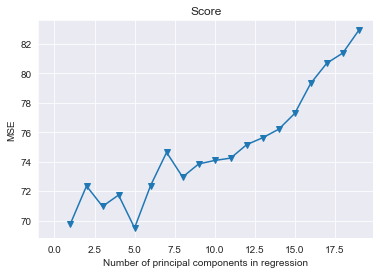

In [65]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [66]:
regr2 = RandomForestRegressor(max_features=11, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

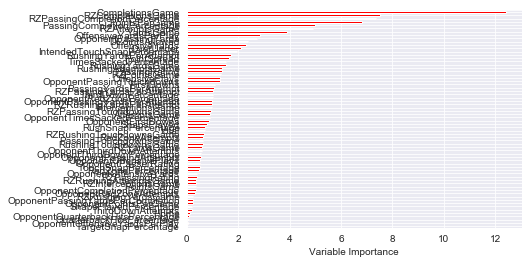

In [67]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [68]:
RB = pd.read_csv('RB/RB.csv')
RB.describe()

,Rank,Week,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,439.930925,4.805526,6.006376,25.613177,2.727949,0.188098,2.104145,1.565356,12.955367,0.075452,0.065887,0.042508,7.158980,7.159001
std,233.979083,2.573476,6.773852,33.904672,3.056308,0.490014,2.729624,2.173641,20.698343,0.291078,0.256646,0.201852,8.881369,8.881366
min,1.000000,1.000000,0.000000,-6.000000,-5.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,-0.400000,-0.400000
25%,236.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,470.000000,5.000000,3.000000,10.000000,2.500000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.500000,3.500000
75%,697.000000,7.000000,11.000000,42.000000,4.400000,0.000000,3.000000,2.000000,18.000000,0.000000,0.000000,0.000000,11.100000,11.100000
max,941.000000,9.000000,32.000000,219.000000,35.000000,3.000000,20.000000,15.000000,124.000000,2.000000,2.000000,1.000000,46.100000,46.100000


In [69]:
RB = RB.set_index(['Name', 'Team'])
RB.head()

Rank Position  Week Opponent  RushingAttempts  \
Name           Team                                                  
Alvin Kamara   NO       1       RB     1       TB                8   
               NO       2       RB     4      NYG               19   
James Conner   PIT      3       RB     8      CLE               24   
Saquon Barkley NYG      4       RB     6      PHI               13   
Todd Gurley    LAR      5       RB     6      DEN               28   

                     RushingYards  RushingYardsPerAttempt  RushingTouchdowns  \
Name           Team                                                            
Alvin Kamara   NO              29                     3.6                  2   
               NO             134                     7.1                  3   
James Conner   PIT            146                     6.1                  2   
Saquon Barkley NYG            130                    10.0                  1   
Todd Gurley    LAR            208                     7.4                  2   

                     ReceivingTargets  Receptions  ReceivingYards  \
Name           Team                                                 
Alvin Kamara   NO                  12           9             112   
               NO                   9           5              47   
James Conner   PIT                  6           5              66   
Saquon Barkley NYG                 12           9              99   
Todd Gurley    LAR                  5           2              17   

                     ReceivingTouchdowns  Fumbles  FumblesLost  \
Name           Team                                              
Alvin Kamara   NO                      1        0            0   
               NO                      0        0            0   
James Conner   PIT                     0        1            0   
Saquon Barkley NYG                     0        0            0   
Todd Gurley    LAR                     0        0            0   

                     FantasyPointsPerGameDraftKings  FantasyPointsDraftKings  
Name           Team                                                           
Alvin Kamara   NO                              46.1                     46.1  
               NO                              44.1                     44.1  
James Conner   PIT                             41.2                     41.2  
Saquon Barkley NYG                             40.9                     40.9  
Todd Gurley    LAR                             39.5                     39.5

In [70]:
RBscore = pd.DataFrame()
RBscore = RB.query('Week == 2')
RB2 = RB[RB.Week < 2]
RB2 = RB2.groupby(['Name', 'Team']).mean()
RB2 = RB2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw2 = pd.DataFrame()
RBw2['Opponent'] = RBscore.Opponent
RBw2['Score'] = RBscore.FantasyPointsDraftKings
RBw2['Week'] = RBscore.Week
RBw2 = RBw2.join(RB2)
RBw2 = RBw2.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 3')
RB3 = RB[RB.Week < 3]
RB3 = RB3.groupby(['Name', 'Team']).mean()
RB3 = RB3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw3 = pd.DataFrame()
RBw3['Opponent'] = RBscore.Opponent
RBw3['Score'] = RBscore.FantasyPointsDraftKings
RBw3['Week'] = RBscore.Week
RBw3 = RBw3.join(RB3)
RBw3 = RBw3.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 4')
RB4 = RB[RB.Week < 4]
RB4 = RB4.groupby(['Name', 'Team']).mean()
RB4 = RB4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw4 = pd.DataFrame()
RBw4['Opponent'] = RBscore.Opponent
RBw4['Score'] = RBscore.FantasyPointsDraftKings
RBw4['Week'] = RBscore.Week
RBw4 = RBw4.join(RB4)
RBw4 = RBw4.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 5')
RB5 = RB[RB.Week < 5]
RB5 = RB5.groupby(['Name', 'Team']).mean()
RB5 = RB5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw5 = pd.DataFrame()
RBw5['Opponent'] = RBscore.Opponent
RBw5['Score'] = RBscore.FantasyPointsDraftKings
RBw5['Week'] = RBscore.Week
RBw5 = RBw5.join(RB5)
RBw5 = RBw5.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 6')
RB6 = RB[RB.Week < 6]
RB6 = RB6.groupby(['Name', 'Team']).mean()
RB6 = RB6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw6 = pd.DataFrame()
RBw6['Opponent'] = RBscore.Opponent
RBw6['Score'] = RBscore.FantasyPointsDraftKings
RBw6['Week'] = RBscore.Week
RBw6 = RBw6.join(RB6)
RBw6 = RBw6.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 7')
RB7 = RB[RB.Week < 7]
RB7 = RB7.groupby(['Name', 'Team']).mean()
RB7 = RB7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw7 = pd.DataFrame()
RBw7['Opponent'] = RBscore.Opponent
RBw7['Score'] = RBscore.FantasyPointsDraftKings
RBw7['Week'] = RBscore.Week
RBw7 = RBw7.join(RB7)
RBw7 = RBw7.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 8')
RB8 = RB[RB.Week < 8]
RB8 = RB8.groupby(['Name', 'Team']).mean()
RB8 = RB8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw8 = pd.DataFrame()
RBw8['Opponent'] = RBscore.Opponent
RBw8['Score'] = RBscore.FantasyPointsDraftKings
RBw8['Week'] = RBscore.Week
RBw8 = RBw8.join(RB8)
RBw8 = RBw8.reset_index()

RBscore = pd.DataFrame()
RBscore = RB.query('Week == 9')
RB9 = RB[RB.Week < 9]
RB9 = RB9.groupby(['Name', 'Team']).mean()
RB9 = RB9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBw9 = pd.DataFrame()
RBw9['Opponent'] = RBscore.Opponent
RBw9['Score'] = RBscore.FantasyPointsDraftKings
RBw9['Week'] = RBscore.Week
RBw9 = RBw9.join(RB9)
RBw9 = RBw9.reset_index()



In [71]:
RBws = RBw2.append(RBw3, ignore_index=True, sort=False).append(RBw4, ignore_index=True, sort=False)\
.append(RBw5, ignore_index=True, sort=False).append(RBw6, ignore_index=True, sort=False)\
.append(RBw7, ignore_index=True, sort=False).append(RBw8, ignore_index=True, sort=False)\
.append(RBw9, ignore_index=True, sort=False)
RBws = RBws.dropna().drop_duplicates()
RBws.describe()

,Score,Week,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,7.399011,5.375158,5.962219,25.204721,2.723526,0.177571,2.167933,1.583715,13.081616,0.070374,0.066786,0.043237,7.074659
std,8.979510,2.289613,6.019404,27.007690,2.240593,0.343751,2.419597,1.856905,16.773059,0.172444,0.173379,0.133055,7.583721
min,-0.400000,2.000000,0.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,-0.300000
25%,0.000000,3.000000,0.250000,0.200000,0.200000,0.000000,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.800000
50%,3.600000,5.000000,4.000000,16.500000,3.000000,0.000000,1.500000,1.000000,7.166667,0.000000,0.000000,0.000000,4.816667
75%,11.800000,7.000000,10.500000,43.400000,4.220000,0.250000,3.000000,2.333333,18.000000,0.000000,0.000000,0.000000,11.433333
max,44.100000,9.000000,31.000000,135.000000,13.000000,2.000000,13.000000,10.000000,112.000000,1.000000,2.000000,1.000000,46.100000


In [72]:
RBavg = pd.DataFrame()
RBavg['Name'] = RBws['Name']
RBavg['Team'] = RBws['Team']
RBavg['Week'] = RBws['Week']
RBavg['Opponent'] = RBws['Opponent']
RBavg['RushesGame'] = RBws['RushingAttempts']
RBavg['RushYardGame'] = RBws['RushingYards']
RBavg['YardAttempt'] = RBws['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RBws['RushingTouchdowns']
RBavg['TargetsGame'] = RBws['ReceivingTargets']
RBavg['RecGame'] = RBws['Receptions']
RBavg['RecYardsGame'] = RBws['ReceivingYards']
RBavg['RecTdGame'] = RBws['ReceivingTouchdowns']
RBavg['PointsGame'] = RBws['FantasyPointsPerGameDraftKings']
RBavg['Score'] = RBws['Score']
RBavg.describe()

,Week,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,5.375158,5.962219,25.204721,2.723526,0.177571,2.167933,1.583715,13.081616,0.070374,7.074659,7.399011
std,2.289613,6.019404,27.007690,2.240593,0.343751,2.419597,1.856905,16.773059,0.172444,7.583721,8.979510
min,2.000000,0.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,-0.300000,-0.400000
25%,3.000000,0.250000,0.200000,0.200000,0.000000,0.333333,0.166667,0.000000,0.000000,0.800000,0.000000
50%,5.000000,4.000000,16.500000,3.000000,0.000000,1.500000,1.000000,7.166667,0.000000,4.816667,3.600000
75%,7.000000,10.500000,43.400000,4.220000,0.250000,3.000000,2.333333,18.000000,0.000000,11.433333,11.800000
max,9.000000,31.000000,135.000000,13.000000,2.000000,13.000000,10.000000,112.000000,1.000000,46.100000,44.100000


In [73]:
RBRZ = pd.read_csv('RB/RBRZ.csv')
RBRZ.head()

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
0,1,Todd Gurley,LAR,RB,2,ARI,10,33,3.3,3,1,1,11,0,0,0,27.4,27.4
1,2,Alvin Kamara,NO,RB,1,TB,4,9,2.2,2,5,3,22,1,0,0,26.1,26.1
2,3,Melvin Gordon,LAC,RB,2,BUF,3,28,9.3,1,3,3,19,2,0,0,25.7,25.7
3,4,Kareem Hunt,KC,RB,7,CIN,3,9,3.0,1,4,3,29,2,0,0,24.8,24.8
4,5,Todd Gurley,LAR,RB,5,SEA,12,35,2.9,3,2,1,8,0,0,0,23.3,23.3


In [74]:
RBRZ = RBRZ.set_index(['Name', 'Team'])
RBRZ.head()

,,Rank,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,
Todd Gurley,LAR,1,RB,2,ARI,10,33,3.3,3,1,1,11,0,0,0,27.4,27.4
Alvin Kamara,NO,2,RB,1,TB,4,9,2.2,2,5,3,22,1,0,0,26.1,26.1
Melvin Gordon,LAC,3,RB,2,BUF,3,28,9.3,1,3,3,19,2,0,0,25.7,25.7
Kareem Hunt,KC,4,RB,7,CIN,3,9,3.0,1,4,3,29,2,0,0,24.8,24.8
Todd Gurley,LAR,5,RB,5,SEA,12,35,2.9,3,2,1,8,0,0,0,23.3,23.3


In [75]:
RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 2')
RBRZ2 = RBRZ[RBRZ.Week < 2]
RBRZ2 = RBRZ2.groupby(['Name', 'Team']).mean()
RBRZ2 = RBRZ2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw2 = pd.DataFrame()
RBRZw2['Opponent'] = RBRZscore.Opponent
RBRZw2['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw2['Week'] = RBRZscore.Week
RBRZw2 = RBRZw2.join(RBRZ2)
RBRZw2 = RBRZw2.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 3')
RBRZ3 = RBRZ[RBRZ.Week < 3]
RBRZ3 = RBRZ3.groupby(['Name', 'Team']).mean()
RBRZ3 = RBRZ3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw3 = pd.DataFrame()
RBRZw3['Opponent'] = RBRZscore.Opponent
RBRZw3['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw3['Week'] = RBRZscore.Week
RBRZw3 = RBRZw3.join(RBRZ3)
RBRZw3 = RBRZw3.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 4')
RBRZ4 = RBRZ[RBRZ.Week < 4]
RBRZ4 = RBRZ4.groupby(['Name', 'Team']).mean()
RBRZ4 = RBRZ4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw4 = pd.DataFrame()
RBRZw4['Opponent'] = RBRZscore.Opponent
RBRZw4['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw4['Week'] = RBRZscore.Week
RBRZw4 = RBRZw4.join(RBRZ4)
RBRZw4 = RBRZw4.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 5')
RBRZ5 = RBRZ[RBRZ.Week < 5]
RBRZ5 = RBRZ5.groupby(['Name', 'Team']).mean()
RBRZ5 = RBRZ5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw5 = pd.DataFrame()
RBRZw5['Opponent'] = RBRZscore.Opponent
RBRZw5['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw5['Week'] = RBRZscore.Week
RBRZw5 = RBRZw5.join(RBRZ5)
RBRZw5 = RBRZw5.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 6')
RBRZ6 = RBRZ[RBRZ.Week < 6]
RBRZ6 = RBRZ6.groupby(['Name', 'Team']).mean()
RBRZ6 = RBRZ6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw6 = pd.DataFrame()
RBRZw6['Opponent'] = RBRZscore.Opponent
RBRZw6['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw6['Week'] = RBRZscore.Week
RBRZw6 = RBRZw6.join(RBRZ6)
RBRZw6 = RBRZw6.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 7')
RBRZ7 = RBRZ[RBRZ.Week < 7]
RBRZ7 = RBRZ7.groupby(['Name', 'Team']).mean()
RBRZ7 = RBRZ7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw7 = pd.DataFrame()
RBRZw7['Opponent'] = RBRZscore.Opponent
RBRZw7['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw7['Week'] = RBRZscore.Week
RBRZw7 = RBRZw7.join(RBRZ7)
RBRZw7 = RBRZw7.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 8')
RBRZ8 = RBRZ[RBRZ.Week < 8]
RBRZ8 = RBRZ8.groupby(['Name', 'Team']).mean()
RBRZ8 = RBRZ8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw8 = pd.DataFrame()
RBRZw8['Opponent'] = RBRZscore.Opponent
RBRZw8['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw8['Week'] = RBRZscore.Week
RBRZw8 = RBRZw8.join(RBRZ8)
RBRZw8 = RBRZw8.reset_index()

RBRZscore = pd.DataFrame()
RBRZscore = RBRZ.query('Week == 9')
RBRZ9 = RBRZ[RBRZ.Week < 9]
RBRZ9 = RBRZ9.groupby(['Name', 'Team']).mean()
RBRZ9 = RBRZ9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBRZw9 = pd.DataFrame()
RBRZw9['Opponent'] = RBRZscore.Opponent
RBRZw9['Score'] = RBRZscore.FantasyPointsDraftKings
RBRZw9['Week'] = RBRZscore.Week
RBRZw9 = RBRZw9.join(RBRZ9)
RBRZw9 = RBRZw9.reset_index()



In [76]:
RBRZws = RBRZw2.append(RBRZw3, ignore_index=True, sort=False).append(RBRZw4, ignore_index=True, sort=False)\
.append(RBRZw5, ignore_index=True, sort=False).append(RBRZw6, ignore_index=True, sort=False)\
.append(RBRZw7, ignore_index=True, sort=False).append(RBRZw8, ignore_index=True, sort=False)\
.append(RBRZw9, ignore_index=True, sort=False)
RBRZws = RBRZws.dropna().drop_duplicates()
RBRZws.describe()


,Score,Week,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,1.933629,5.378173,0.894552,2.190583,0.873033,0.153972,0.300465,0.204789,1.220173,0.050213,0.016396,0.009241,1.814690
std,4.063958,2.289500,1.182479,3.491015,1.228863,0.311874,0.545663,0.404250,2.787997,0.151137,0.078114,0.064859,3.059755
min,-0.700000,2.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,-1.666667,0.000000,0.000000,0.000000,-0.800000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,0.333333,0.500000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.275000
75%,1.300000,7.000000,1.500000,3.250000,1.500000,0.166667,0.500000,0.285714,1.200000,0.000000,0.000000,0.000000,2.589583
max,27.400000,9.000000,7.500000,26.000000,9.500000,2.000000,5.000000,3.000000,22.000000,1.000000,1.000000,1.000000,26.100000


In [77]:
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RBRZws['Name']
RBRZavg['Week'] = RBRZws['Week']
RBRZavg['RZattemptsGame'] = RBRZws['RushingAttempts']
RBRZavg['RZyardsGame'] = RBRZws['RushingYards']
RBRZavg['RZYardAtt'] = RBRZws['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RBRZws['RushingTouchdowns']
RBRZavg['RZTarGame'] = RBRZws['ReceivingTargets']
RBRZavg['RZRecGame'] = RBRZws['Receptions']
RBRZavg['RZRecYarGame'] = RBRZws['ReceivingYards']
RBRZavg['RZRecTDGame'] = RBRZws['ReceivingTouchdowns']
RBRZavg['RZPointsGame'] = RBRZws['FantasyPointsPerGameDraftKings']
RBRZavg.describe()

,Week,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,5.378173,0.894552,2.190583,0.873033,0.153972,0.300465,0.204789,1.220173,0.050213,1.814690
std,2.289500,1.182479,3.491015,1.228863,0.311874,0.545663,0.404250,2.787997,0.151137,3.059755
min,2.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,-1.666667,0.000000,-0.800000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.333333,0.500000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.275000
75%,7.000000,1.500000,3.250000,1.500000,0.166667,0.500000,0.285714,1.200000,0.000000,2.589583
max,9.000000,7.500000,26.000000,9.500000,2.000000,5.000000,3.000000,22.000000,1.000000,26.100000


In [78]:
RBsnaps = pd.read_csv('RB/RBsnaps.csv')

RBsnaps = RBsnaps.set_index(['Name', 'Team'])

In [79]:
RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 2')
RBsnaps2 = RBsnaps[RBsnaps.Week < 2]
RBsnaps2 = RBsnaps2.groupby(['Name', 'Team']).mean()
RBsnaps2 = RBsnaps2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw2 = pd.DataFrame()
RBsnapsw2['Opponent'] = RBsnapsscore.Opponent
RBsnapsw2['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw2['Week'] = RBsnapsscore.Week
RBsnapsw2 = RBsnapsw2.join(RBsnaps2)
RBsnapsw2 = RBsnapsw2.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 3')
RBsnaps3 = RBsnaps[RBsnaps.Week < 3]
RBsnaps3 = RBsnaps3.groupby(['Name', 'Team']).mean()
RBsnaps3 = RBsnaps3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw3 = pd.DataFrame()
RBsnapsw3['Opponent'] = RBsnapsscore.Opponent
RBsnapsw3['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw3['Week'] = RBsnapsscore.Week
RBsnapsw3 = RBsnapsw3.join(RBsnaps3)
RBsnapsw3 = RBsnapsw3.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 4')
RBsnaps4 = RBsnaps[RBsnaps.Week < 4]
RBsnaps4 = RBsnaps4.groupby(['Name', 'Team']).mean()
RBsnaps4 = RBsnaps4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw4 = pd.DataFrame()
RBsnapsw4['Opponent'] = RBsnapsscore.Opponent
RBsnapsw4['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw4['Week'] = RBsnapsscore.Week
RBsnapsw4 = RBsnapsw4.join(RBsnaps4)
RBsnapsw4 = RBsnapsw4.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 5')
RBsnaps5 = RBsnaps[RBsnaps.Week < 5]
RBsnaps5 = RBsnaps5.groupby(['Name', 'Team']).mean()
RBsnaps5 = RBsnaps5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw5 = pd.DataFrame()
RBsnapsw5['Opponent'] = RBsnapsscore.Opponent
RBsnapsw5['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw5['Week'] = RBsnapsscore.Week
RBsnapsw5 = RBsnapsw5.join(RBsnaps5)
RBsnapsw5 = RBsnapsw5.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 6')
RBsnaps6 = RBsnaps[RBsnaps.Week < 6]
RBsnaps6 = RBsnaps6.groupby(['Name', 'Team']).mean()
RBsnaps6 = RBsnaps6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw6 = pd.DataFrame()
RBsnapsw6['Opponent'] = RBsnapsscore.Opponent
RBsnapsw6['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw6['Week'] = RBsnapsscore.Week
RBsnapsw6 = RBsnapsw6.join(RBsnaps6)
RBsnapsw6 = RBsnapsw6.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 7')
RBsnaps7 = RBsnaps[RBsnaps.Week < 7]
RBsnaps7 = RBsnaps7.groupby(['Name', 'Team']).mean()
RBsnaps7 = RBsnaps7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw7 = pd.DataFrame()
RBsnapsw7['Opponent'] = RBsnapsscore.Opponent
RBsnapsw7['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw7['Week'] = RBsnapsscore.Week
RBsnapsw7 = RBsnapsw7.join(RBsnaps7)
RBsnapsw7 = RBsnapsw7.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 8')
RBsnaps8 = RBsnaps[RBsnaps.Week < 8]
RBsnaps8 = RBsnaps8.groupby(['Name', 'Team']).mean()
RBsnaps8 = RBsnaps8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw8 = pd.DataFrame()
RBsnapsw8['Opponent'] = RBsnapsscore.Opponent
RBsnapsw8['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw8['Week'] = RBsnapsscore.Week
RBsnapsw8 = RBsnapsw8.join(RBsnaps8)
RBsnapsw8 = RBsnapsw8.reset_index()

RBsnapsscore = pd.DataFrame()
RBsnapsscore = RBsnaps.query('Week == 9')
RBsnaps9 = RBsnaps[RBsnaps.Week < 9]
RBsnaps9 = RBsnaps9.groupby(['Name', 'Team']).mean()
RBsnaps9 = RBsnaps9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
RBsnapsw9 = pd.DataFrame()
RBsnapsw9['Opponent'] = RBsnapsscore.Opponent
RBsnapsw9['Score'] = RBsnapsscore.FantasyPointsDraftKings
RBsnapsw9['Week'] = RBsnapsscore.Week
RBsnapsw9 = RBsnapsw9.join(RBsnaps9)
RBsnapsw9 = RBsnapsw9.reset_index()



In [80]:
RBsnapsws = RBsnapsw2.append(RBsnapsw3, ignore_index=True, sort=False).append(RBsnapsw4, ignore_index=True, sort=False)\
.append(RBsnapsw5, ignore_index=True, sort=False).append(RBsnapsw6, ignore_index=True, sort=False)\
.append(RBsnapsw7, ignore_index=True, sort=False).append(RBsnapsw8, ignore_index=True, sort=False)\
.append(RBsnapsw9, ignore_index=True, sort=False)
RBsnapsws = RBsnapsws.dropna().drop_duplicates()
RBsnapsws.describe()


,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,7.399011,5.375158,21.261933,31.557956,23.345692,8.173711,29.305117,31.529274,26.239865
std,8.979510,2.289613,16.392056,24.287008,19.057068,6.740420,19.908081,20.302565,23.058602
min,-0.400000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.300000
25%,0.000000,3.000000,7.333333,10.900000,3.450000,2.900000,10.471429,12.500000,9.540000
50%,3.600000,5.000000,18.428571,27.471429,24.150000,7.550000,32.375000,36.280000,23.940000
75%,11.800000,7.000000,33.000000,46.950000,36.775000,11.650000,43.580000,45.633333,36.340000
max,44.100000,9.000000,77.000000,96.400000,100.000000,50.000000,100.000000,100.000000,240.300000


In [81]:
RBsnaps = RBsnapsws.drop(['Team', 'Opponent', 'Score', 'FantasyPointSnapPercentageDraftKings'], axis=1)


In [82]:
Defense2 = Defense[Defense.Week < 2]
Defense2 = Defense2.groupby('Team').mean()
Defense2 = Defense2.drop('Week', axis = 1)
Defense2 = Defense2.reset_index()
RBd2 = pd.DataFrame()
RBd2['Opponent'] = Defense2['Team']
RBd2['Week'] = 2
RBd2['DPointsAllowed'] = Defense2.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense3 = Defense[Defense.Week < 3]
Defense3 = Defense3.groupby('Team').mean()
Defense3 = Defense3.drop('Week', axis = 1)
Defense3 = Defense3.reset_index()
RBd3 = pd.DataFrame()
RBd3['Opponent'] = Defense3['Team']
RBd3['Week'] = 3
RBd3['DPointsAllowed'] = Defense3.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense4 = Defense[Defense.Week < 4]
Defense4 = Defense4.groupby('Team').mean()
Defense4 = Defense4.drop('Week', axis = 1)
Defense4 = Defense4.reset_index()
RBd4 = pd.DataFrame()
RBd4['Opponent'] = Defense4['Team']
RBd4['Week'] = 4
RBd4['DPointsAllowed'] = Defense4.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense5 = Defense[Defense.Week < 5]
Defense5 = Defense5.groupby('Team').mean()
Defense5 = Defense5.drop('Week', axis = 1)
Defense5 = Defense5.reset_index()
RBd5 = pd.DataFrame()
RBd5['Opponent'] = Defense5['Team']
RBd5['Week'] = 5
RBd5['DPointsAllowed'] = Defense5.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense6 = Defense[Defense.Week < 6]
Defense6 = Defense6.groupby('Team').mean()
Defense6 = Defense6.drop('Week', axis = 1)
Defense6 = Defense6.reset_index()
RBd6 = pd.DataFrame()
RBd6['Opponent'] = Defense6['Team']
RBd6['Week'] = 6
RBd6['DPointsAllowed'] = Defense6.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense7 = Defense[Defense.Week < 7]
Defense7 = Defense7.groupby('Team').mean()
Defense7 = Defense7.drop('Week', axis = 1)
Defense7 = Defense7.reset_index()
RBd7 = pd.DataFrame()
RBd7['Opponent'] = Defense7['Team']
RBd7['Week'] = 7
RBd7['DPointsAllowed'] = Defense7.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense8 = Defense[Defense.Week < 8]
Defense8 = Defense8.groupby('Team').mean()
Defense8 = Defense8.drop('Week', axis = 1)
Defense8 = Defense8.reset_index()
RBd8 = pd.DataFrame()
RBd8['Opponent'] = Defense8['Team']
RBd8['Week'] = 8
RBd8['DPointsAllowed'] = Defense8.DraftKingsRunningbackFantasyPointsAllowedAverage

Defense9 = Defense[Defense.Week < 9]
Defense9 = Defense9.groupby('Team').mean()
Defense9 = Defense9.drop('Week', axis = 1)
Defense9 = Defense9.reset_index()
RBd9 = pd.DataFrame()
RBd9['Opponent'] = Defense9['Team']
RBd9['Week'] = 9
RBd9['DPointsAllowed'] = Defense9.DraftKingsRunningbackFantasyPointsAllowedAverage



In [83]:
RBds = RBd2.append(RBd3, ignore_index=True, sort=False).append(RBd4, ignore_index=True, sort=False)\
.append(RBd5, ignore_index=True, sort=False).append(RBd6, ignore_index=True, sort=False)\
.append(RBd7, ignore_index=True, sort=False).append(RBd8, ignore_index=True, sort=False)\
.append(RBd9, ignore_index=True, sort=False)


In [84]:
RBavg = RBavg.set_index(['Name', 'Week'])
RBRZavg = RBRZavg.set_index(['Name', 'Week'])
RBs = RBavg.join(RBRZavg, lsuffix='avg', rsuffix='rzavg')
RBs = RBs.drop_duplicates().dropna()
RBs.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,6.062101,25.626965,2.769153,0.180546,2.204251,1.610246,13.300767,0.071553,7.193177,7.522964,0.908385,2.224458,0.886533,0.156353,0.305112,0.207956,1.239042,0.050990,1.842753
std,6.019529,27.033606,2.231134,0.345846,2.423324,1.860956,16.826647,0.173642,7.591043,9.002802,1.186307,3.507198,1.233492,0.313686,0.548579,0.406557,2.805330,0.152172,3.074944
min,0.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,-0.300000,-0.400000,0.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,-1.666667,0.000000,-0.800000
25%,0.333333,0.383333,0.333333,0.000000,0.333333,0.200000,0.312500,0.000000,0.884286,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,17.000000,3.053571,0.000000,1.500000,1.000000,7.450000,0.000000,5.000000,4.000000,0.400000,0.500000,0.387500,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000
75%,10.616667,43.628571,4.233333,0.250000,3.000000,2.333333,18.233333,0.000000,11.528125,12.000000,1.500000,3.333333,1.500000,0.175000,0.500000,0.285714,1.250000,0.000000,2.665625
max,31.000000,135.000000,13.000000,2.000000,13.000000,10.000000,112.000000,1.000000,46.100000,44.100000,7.500000,26.000000,9.500000,2.000000,5.000000,3.000000,22.000000,1.000000,26.100000


In [85]:
RBsnaps = RBsnaps.set_index(['Name', 'Week'])
RBs = RBs.join(RBsnaps, lsuffix='avg', rsuffix='rzavg')
RBs = RBs.drop_duplicates().dropna()
RBs.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,6.062101,25.626965,2.769153,0.180546,2.204251,1.610246,13.300767,0.071553,7.193177,7.522964,...,0.207956,1.239042,0.050990,1.842753,21.594684,32.053441,23.736792,8.310642,29.796053,32.057471
std,6.019529,27.033606,2.231134,0.345846,2.423324,1.860956,16.826647,0.173642,7.591043,9.002802,...,0.406557,2.805330,0.152172,3.074944,16.318499,24.175479,18.972831,6.712370,19.706166,20.053774
min,0.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,-0.300000,-0.400000,...,0.000000,-1.666667,0.000000,-0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.383333,0.333333,0.000000,0.333333,0.200000,0.312500,0.000000,0.884286,0.100000,...,0.000000,0.000000,0.000000,0.000000,7.666667,11.604167,5.131250,3.250000,11.997024,14.450000
50%,4.500000,17.000000,3.053571,0.000000,1.500000,1.000000,7.450000,0.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.300000,19.452381,29.000000,24.666667,7.700000,32.801190,36.495000
75%,10.616667,43.628571,4.233333,0.250000,3.000000,2.333333,18.233333,0.000000,11.528125,12.000000,...,0.285714,1.250000,0.000000,2.665625,33.062500,47.545000,37.143750,11.750000,43.757500,45.837500
max,31.000000,135.000000,13.000000,2.000000,13.000000,10.000000,112.000000,1.000000,46.100000,44.100000,...,3.000000,22.000000,1.000000,26.100000,77.000000,96.400000,100.000000,50.000000,100.000000,100.000000


In [86]:
RBs = RBs.reset_index()

In [87]:
RBtest = RBs.set_index(['Week', 'Opponent'])
RBdtest = RBds.set_index(['Week', 'Opponent'])
RBho = RBtest.join(RBdtest, lsuffix='norm', rsuffix='d')
RBho = RBho.reset_index()
RBhope = RBho.dropna().drop_duplicates()
RBhope.describe()


,Week,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,DPointsAllowed
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,5.372423,6.062101,25.626965,2.769153,0.180546,2.204251,1.610246,13.300767,0.071553,7.193177,...,1.239042,0.050990,1.842753,21.594684,32.053441,23.736792,8.310642,29.796053,32.057471,25.141939
std,2.285824,6.019529,27.033606,2.231134,0.345846,2.423324,1.860956,16.826647,0.173642,7.591043,...,2.805330,0.152172,3.074944,16.318499,24.175479,18.972831,6.712370,19.706166,20.053774,7.331219
min,2.000000,0.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,-0.300000,...,-1.666667,0.000000,-0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000
25%,3.000000,0.333333,0.383333,0.333333,0.000000,0.333333,0.200000,0.312500,0.000000,0.884286,...,0.000000,0.000000,0.000000,7.666667,11.604167,5.131250,3.250000,11.997024,14.450000,19.950000
50%,5.000000,4.500000,17.000000,3.053571,0.000000,1.500000,1.000000,7.450000,0.000000,5.000000,...,0.000000,0.000000,0.300000,19.452381,29.000000,24.666667,7.700000,32.801190,36.495000,24.450000
75%,7.000000,10.616667,43.628571,4.233333,0.250000,3.000000,2.333333,18.233333,0.000000,11.528125,...,1.250000,0.000000,2.665625,33.062500,47.545000,37.143750,11.750000,43.757500,45.837500,29.540000
max,9.000000,31.000000,135.000000,13.000000,2.000000,13.000000,10.000000,112.000000,1.000000,46.100000,...,22.000000,1.000000,26.100000,77.000000,96.400000,100.000000,50.000000,100.000000,100.000000,54.300000


In [88]:
RBhope1 = RBhope.set_index(['Week', 'Team'])
Vegashope = Vegas.set_index(['Week', 'Team'])
RBfi = RBhope1.join(Vegashope)


In [89]:
RBs = RBfi.reset_index()

In [90]:
RBs = RBs.set_index('Team')
RBOffense = RBOffense.set_index('Team')
RBs = RBs.join(RBOffense)
RBs.columns

Index(['Week', 'Opponent', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayed', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage'],
      dtype='object')

In [91]:
RBs = RBs.reset_index()

In [92]:
RBs = RBs.set_index('Opponent')
RBDef = RBDef.set_index('Opponent')
RBs = RBs.join(RBDef)
RBs = RBs.reset_index()
RBs.columns

Index(['Opponent', 'Team', 'Week', 'Name', 'RushesGame', 'RushYardGame',
       'YardAttempt', 'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame',
       'RecTdGame', 'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame',
       'RZYardAtt', 'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame',
       'RZRecTDGame', 'RZPointsGame', 'SnapsPlayed', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdD

In [93]:
RBs.head()

,Opponent,Team,Week,Name,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
0,ARI,CHI,3,Jordan Howard,14.500000,58.500000,4.00,0.000000,4.500000,4.000000,...,5.4,22.0,13.444444,39.7,3.222222,58.6,140.333333,4.3,25.1,1.444444
1,ARI,CHI,3,Tarik Cohen,4.500000,16.500000,3.50,0.000000,2.500000,2.000000,...,5.4,22.0,13.444444,39.7,3.222222,58.6,140.333333,4.3,25.1,1.444444
2,ARI,CHI,3,Benjamin Cunningham,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,5.4,22.0,13.444444,39.7,3.222222,58.6,140.333333,4.3,25.1,1.444444
3,ARI,CHI,3,Michael Burton,0.000000,0.000000,0.00,0.000000,1.000000,1.000000,...,5.4,22.0,13.444444,39.7,3.222222,58.6,140.333333,4.3,25.1,1.444444
4,ARI,DEN,7,Phillip Lindsay,10.166667,57.666667,5.45,0.166667,3.166667,2.333333,...,5.4,22.0,13.444444,39.7,3.222222,58.6,140.333333,4.3,25.1,1.444444


In [94]:
RBs = RBs.drop(['Opponent', 'Team', 'Week'], axis=1)

In [95]:
RBtrain = RBs.dropna().drop_duplicates()
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,6.062101,25.626965,2.769153,0.180546,2.204251,1.610246,13.300767,0.071553,7.193177,7.522964,...,5.696778,20.760559,12.723426,39.763144,3.250737,59.227835,112.873318,4.383892,22.165077,0.842353
std,6.019529,27.033606,2.231134,0.345846,2.423324,1.860956,16.826647,0.173642,7.591043,9.002802,...,0.483511,2.173165,1.101083,5.410268,0.438822,11.588495,17.816981,0.492615,4.768624,0.306009
min,0.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,-0.300000,-0.400000,...,4.800000,17.879899,10.564655,25.700000,2.106286,34.800000,80.180172,3.600000,12.500000,0.221714
25%,0.333333,0.383333,0.333333,0.000000,0.333333,0.200000,0.312500,0.000000,0.884286,0.100000,...,5.300000,18.888889,11.800000,36.800000,3.000000,51.400000,99.085345,4.000000,18.725000,0.666667
50%,4.500000,17.000000,3.053571,0.000000,1.500000,1.000000,7.450000,0.000000,5.000000,4.000000,...,5.700000,20.547131,13.093860,39.200000,3.225000,58.600000,112.737097,4.400000,22.800000,0.800000
75%,10.616667,43.628571,4.233333,0.250000,3.000000,2.333333,18.233333,0.000000,11.528125,12.000000,...,6.000000,21.800000,13.437688,42.400000,3.551890,67.900000,122.394298,4.800000,25.100000,1.000000
max,31.000000,135.000000,13.000000,2.000000,13.000000,10.000000,112.000000,1.000000,46.100000,44.100000,...,6.700000,26.444444,14.856522,56.200000,4.000000,87.500000,142.000000,5.200000,33.000000,1.444444


In [96]:
RBtrain.to_csv('2015RB.csv')

In [97]:
X_train = RBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = RBtrain.Score

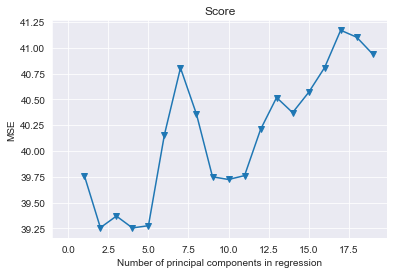

In [98]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [99]:
regr2 = RandomForestRegressor(max_features=10, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

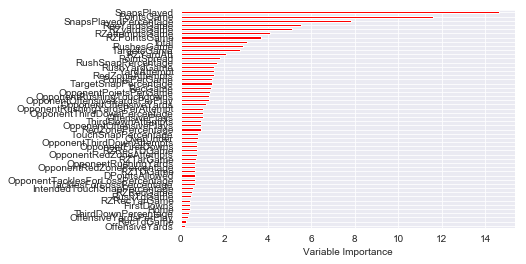

In [100]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [101]:
WR = pd.read_csv('WR/WR.csv')
WR.describe()


,Rank,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,624.022108,4.824613,4.032424,2.557848,48.488946,33.136330,0.218128,15.587325,6.284451,9.278850,0.163596,1.058954,0.802358,0.003685,0.056743,0.022845,7.595431,7.595416
std,325.754341,2.572010,3.785800,2.633278,36.861884,37.684842,0.480777,16.164870,6.384257,8.810664,0.589786,4.748178,3.471023,0.060611,0.249824,0.154318,8.628571,8.628533
min,1.000000,1.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-4.000000,-4.000000,-4.000000,0.000000,-11.000000,-11.000000,0.000000,0.000000,0.000000,-1.100000,-1.100000
25%,336.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,675.000000,5.000000,3.000000,2.000000,53.300000,21.000000,0.000000,13.000000,5.600000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000,5.100000
75%,970.000000,7.000000,6.000000,4.000000,75.000000,53.000000,0.000000,23.000000,9.500000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.900000,11.900000
max,1357.000000,9.000000,19.000000,16.000000,100.000000,211.000000,3.000000,76.000000,48.000000,56.000000,11.000000,61.000000,35.000000,1.000000,2.000000,2.000000,45.300000,45.300000


In [102]:
WR = WR.set_index(['Name', 'Team'])
WR.head()


Rank Position  Week Opponent  ReceivingTargets  \
Name           Team                                                   
Tyreek Hill    KC       1       WR     1      LAC                 8   
Calvin Ridley  ATL      2       WR     3       NO                 8   
Tyreek Hill    KC       3       WR     6       NE                12   
Michael Thomas NO       4       WR     9      LAR                15   
               NO       5       WR     1       TB                17   

                     Receptions  ReceptionPercentage  ReceivingYards  \
Name           Team                                                    
Tyreek Hill    KC             7                 87.5             169   
Calvin Ridley  ATL            7                 87.5             146   
Tyreek Hill    KC             7                 58.3             142   
Michael Thomas NO            12                 80.0             211   
               NO            16                 94.1             180   

                     ReceivingTouchdowns  ReceivingLong  \
Name           Team                                       
Tyreek Hill    KC                      2             58   
Calvin Ridley  ATL                     3             75   
Tyreek Hill    KC                      3             75   
Michael Thomas NO                      1             72   
               NO                      1             35   

                     ReceivingYardsPerTarget  ReceivingYardsPerReception  \
Name           Team                                                        
Tyreek Hill    KC                       21.1                        24.1   
Calvin Ridley  ATL                      18.2                        20.9   
Tyreek Hill    KC                       11.8                        20.3   
Michael Thomas NO                       14.1                        17.6   
               NO                       10.6                        11.2   

                     RushingAttempts  RushingYards  RushingYardsPerAttempt  \
Name           Team                                                          
Tyreek Hill    KC                  2             4                     2.0   
Calvin Ridley  ATL                 1             9                     9.0   
Tyreek Hill    KC                  1             0                     0.0   
Michael Thomas NO                  0             0                     0.0   
               NO                  0             0                     0.0   

                     RushingTouchdowns  Fumbles  FumblesLost  \
Name           Team                                            
Tyreek Hill    KC                    0        0            0   
Calvin Ridley  ATL                   0        0            0   
Tyreek Hill    KC                    0        0            0   
Michael Thomas NO                    0        0            0   
               NO                    0        1            1   

                     FantasyPointsPerGameDraftKings  FantasyPointsDraftKings  
Name           Team                                                           
Tyreek Hill    KC                              45.3                     45.3  
Calvin Ridley  ATL                             43.5                     43.5  
Tyreek Hill    KC                              42.2                     42.2  
Michael Thomas NO                              42.1                     42.1  
               NO                              42.0                     42.0

In [103]:
WRscore = pd.DataFrame()
WRscore = WR.query('Week == 2')
WR2 = WR[WR.Week < 2]
WR2 = WR2.groupby(['Name', 'Team']).mean()
WR2 = WR2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw2 = pd.DataFrame()
WRw2['Opponent'] = WRscore.Opponent
WRw2['Score'] = WRscore.FantasyPointsDraftKings
WRw2['Week'] = WRscore.Week
WRw2 = WRw2.join(WR2)
WRw2 = WRw2.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 3')
WR3 = WR[WR.Week < 3]
WR3 = WR3.groupby(['Name', 'Team']).mean()
WR3 = WR3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw3 = pd.DataFrame()
WRw3['Opponent'] = WRscore.Opponent
WRw3['Score'] = WRscore.FantasyPointsDraftKings
WRw3['Week'] = WRscore.Week
WRw3 = WRw3.join(WR3)
WRw3 = WRw3.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 4')
WR4 = WR[WR.Week < 4]
WR4 = WR4.groupby(['Name', 'Team']).mean()
WR4 = WR4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw4 = pd.DataFrame()
WRw4['Opponent'] = WRscore.Opponent
WRw4['Score'] = WRscore.FantasyPointsDraftKings
WRw4['Week'] = WRscore.Week
WRw4 = WRw4.join(WR4)
WRw4 = WRw4.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 5')
WR5 = WR[WR.Week < 5]
WR5 = WR5.groupby(['Name', 'Team']).mean()
WR5 = WR5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw5 = pd.DataFrame()
WRw5['Opponent'] = WRscore.Opponent
WRw5['Score'] = WRscore.FantasyPointsDraftKings
WRw5['Week'] = WRscore.Week
WRw5 = WRw5.join(WR5)
WRw5 = WRw5.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 6')
WR6 = WR[WR.Week < 6]
WR6 = WR6.groupby(['Name', 'Team']).mean()
WR6 = WR6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw6 = pd.DataFrame()
WRw6['Opponent'] = WRscore.Opponent
WRw6['Score'] = WRscore.FantasyPointsDraftKings
WRw6['Week'] = WRscore.Week
WRw6 = WRw6.join(WR6)
WRw6 = WRw6.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 7')
WR7 = WR[WR.Week < 7]
WR7 = WR7.groupby(['Name', 'Team']).mean()
WR7 = WR7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw7 = pd.DataFrame()
WRw7['Opponent'] = WRscore.Opponent
WRw7['Score'] = WRscore.FantasyPointsDraftKings
WRw7['Week'] = WRscore.Week
WRw7 = WRw7.join(WR7)
WRw7 = WRw7.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 8')
WR8 = WR[WR.Week < 8]
WR8 = WR8.groupby(['Name', 'Team']).mean()
WR8 = WR8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw8 = pd.DataFrame()
WRw8['Opponent'] = WRscore.Opponent
WRw8['Score'] = WRscore.FantasyPointsDraftKings
WRw8['Week'] = WRscore.Week
WRw8 = WRw8.join(WR8)
WRw8 = WRw8.reset_index()

WRscore = pd.DataFrame()
WRscore = WR.query('Week == 9')
WR9 = WR[WR.Week < 9]
WR9 = WR9.groupby(['Name', 'Team']).mean()
WR9 = WR9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRw9 = pd.DataFrame()
WRw9['Opponent'] = WRscore.Opponent
WRw9['Score'] = WRscore.FantasyPointsDraftKings
WRw9['Week'] = WRscore.Week
WRw9 = WRw9.join(WR9)
WRw9 = WRw9.reset_index()



In [104]:
WRws = WRw2.append(WRw3, ignore_index=True, sort=False).append(WRw4, ignore_index=True, sort=False)\
.append(WRw5, ignore_index=True, sort=False).append(WRw6, ignore_index=True, sort=False)\
.append(WRw7, ignore_index=True, sort=False).append(WRw8, ignore_index=True, sort=False)\
.append(WRw9, ignore_index=True, sort=False)
WRws = WRws.dropna().drop_duplicates()
WRws.describe()


,Score,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,7.918671,5.390611,4.173738,2.647017,47.562802,33.696184,0.238680,15.364233,6.070071,8.981848,0.149734,0.830779,0.668958,0.001870,0.057625,0.024674,7.870316
std,8.566983,2.272395,3.588936,2.471203,28.415709,33.293804,0.328968,12.633653,4.509923,6.324840,0.334943,2.481402,2.060864,0.020954,0.168544,0.101705,7.604901
min,-1.100000,2.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-0.500000,-1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,3.000000,1.000000,0.500000,25.000000,4.571429,0.000000,4.000000,2.500000,3.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.266667
50%,5.500000,5.000000,3.800000,2.000000,54.166667,25.000000,0.000000,14.000000,6.175000,9.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.133333
75%,12.100000,7.000000,6.333333,4.250000,69.260000,54.000000,0.400000,24.000000,8.975000,13.233333,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,12.600000
max,43.500000,9.000000,19.000000,16.000000,100.000000,180.000000,2.000000,75.000000,41.000000,41.000000,3.000000,19.000000,19.000000,0.333333,2.000000,1.000000,45.300000


In [105]:
WRavg = pd.DataFrame()
WRavg['Name'] = WRws['Name']
WRavg['Week'] = WRws['Week']
WRavg['Team'] = WRws['Team']
WRavg['Opponent'] = WRws['Opponent']
WRavg['TargetsGame'] = WRws['ReceivingTargets']
WRavg['RecGame'] = WRws['Receptions']
WRavg['RecPercentage'] = WRws['ReceptionPercentage']
WRavg['RecYardsGame'] = WRws['ReceivingYards']
WRavg['RecTdGame'] = WRws['ReceivingTouchdowns']
WRavg['YardsTarget'] = WRws['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WRws['ReceivingYardsPerReception']
WRavg['RushesGame'] = WRws['RushingAttempts']
WRavg['RushYardsGame'] = WRws['RushingYards']
WRavg['YardAttempt'] = WRws['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WRws['RushingTouchdowns']
WRavg['PointsGame'] = WRws['FantasyPointsPerGameDraftKings']
WRavg['Score'] = WRws['Score']

In [106]:
WRRZ = pd.read_csv('WR/WRRZ.csv')
WRRZ.head()

,Rank,Name,Team,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,...,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
0,1,Cole Beasley,DAL,WR,6,JAX,3,3,100.0,34,...,11.3,11.3,0,0,0.0,0,0,0,18.4,18.4
1,2,Aldrick Robinson,MIN,WR,4,LAR,2,2,100.0,33,...,16.5,16.5,0,0,0.0,0,0,0,17.3,17.3
2,3,Alshon Jeffery,PHI,WR,6,NYG,3,3,100.0,21,...,7.0,7.0,0,0,0.0,0,0,0,17.1,17.1
3,3,Michael Thomas,NO,WR,2,CLE,4,3,75.0,21,...,5.2,7.0,0,0,0.0,0,0,0,17.1,17.1
4,5,Calvin Ridley,ATL,WR,3,NO,2,2,100.0,27,...,13.5,13.5,0,0,0.0,0,0,0,16.7,16.7


In [107]:
WRRZ = WRRZ.set_index(['Name', 'Team'])
WRRZ.head()

,,Rank,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,,,,,
Cole Beasley,DAL,1,WR,6,JAX,3,3,100.0,34,2,17.0,11.3,11.3,0,0,0.0,0,0,0,18.4,18.4
Aldrick Robinson,MIN,2,WR,4,LAR,2,2,100.0,33,2,17.0,16.5,16.5,0,0,0.0,0,0,0,17.3,17.3
Alshon Jeffery,PHI,3,WR,6,NYG,3,3,100.0,21,2,13.0,7.0,7.0,0,0,0.0,0,0,0,17.1,17.1
Michael Thomas,NO,3,WR,2,CLE,4,3,75.0,21,2,14.0,5.2,7.0,0,0,0.0,0,0,0,17.1,17.1
Calvin Ridley,ATL,5,WR,3,NO,2,2,100.0,27,2,18.0,13.5,13.5,0,0,0.0,0,0,0,16.7,16.7


In [108]:
WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 2')
WRRZ2 = WRRZ[WRRZ.Week < 2]
WRRZ2 = WRRZ2.groupby(['Name', 'Team']).mean()
WRRZ2 = WRRZ2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw2 = pd.DataFrame()
WRRZw2['Opponent'] = WRRZscore.Opponent
WRRZw2['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw2['Week'] = WRRZscore.Week
WRRZw2 = WRRZw2.join(WRRZ2)
WRRZw2 = WRRZw2.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 3')
WRRZ3 = WRRZ[WRRZ.Week < 3]
WRRZ3 = WRRZ3.groupby(['Name', 'Team']).mean()
WRRZ3 = WRRZ3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw3 = pd.DataFrame()
WRRZw3['Opponent'] = WRRZscore.Opponent
WRRZw3['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw3['Week'] = WRRZscore.Week
WRRZw3 = WRRZw3.join(WRRZ3)
WRRZw3 = WRRZw3.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 4')
WRRZ4 = WRRZ[WRRZ.Week < 4]
WRRZ4 = WRRZ4.groupby(['Name', 'Team']).mean()
WRRZ4 = WRRZ4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw4 = pd.DataFrame()
WRRZw4['Opponent'] = WRRZscore.Opponent
WRRZw4['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw4['Week'] = WRRZscore.Week
WRRZw4 = WRRZw4.join(WRRZ4)
WRRZw4 = WRRZw4.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 5')
WRRZ5 = WRRZ[WRRZ.Week < 5]
WRRZ5 = WRRZ5.groupby(['Name', 'Team']).mean()
WRRZ5 = WRRZ5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw5 = pd.DataFrame()
WRRZw5['Opponent'] = WRRZscore.Opponent
WRRZw5['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw5['Week'] = WRRZscore.Week
WRRZw5 = WRRZw5.join(WRRZ5)
WRRZw5 = WRRZw5.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 6')
WRRZ6 = WRRZ[WRRZ.Week < 6]
WRRZ6 = WRRZ6.groupby(['Name', 'Team']).mean()
WRRZ6 = WRRZ6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw6 = pd.DataFrame()
WRRZw6['Opponent'] = WRRZscore.Opponent
WRRZw6['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw6['Week'] = WRRZscore.Week
WRRZw6 = WRRZw6.join(WRRZ6)
WRRZw6 = WRRZw6.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 7')
WRRZ7 = WRRZ[WRRZ.Week < 7]
WRRZ7 = WRRZ7.groupby(['Name', 'Team']).mean()
WRRZ7 = WRRZ7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw7 = pd.DataFrame()
WRRZw7['Opponent'] = WRRZscore.Opponent
WRRZw7['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw7['Week'] = WRRZscore.Week
WRRZw7 = WRRZw7.join(WRRZ7)
WRRZw7 = WRRZw7.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 8')
WRRZ8 = WRRZ[WRRZ.Week < 8]
WRRZ8 = WRRZ8.groupby(['Name', 'Team']).mean()
WRRZ8 = WRRZ8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw8 = pd.DataFrame()
WRRZw8['Opponent'] = WRRZscore.Opponent
WRRZw8['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw8['Week'] = WRRZscore.Week
WRRZw8 = WRRZw8.join(WRRZ8)
WRRZw8 = WRRZw8.reset_index()

WRRZscore = pd.DataFrame()
WRRZscore = WRRZ.query('Week == 9')
WRRZ9 = WRRZ[WRRZ.Week < 9]
WRRZ9 = WRRZ9.groupby(['Name', 'Team']).mean()
WRRZ9 = WRRZ9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRRZw9 = pd.DataFrame()
WRRZw9['Opponent'] = WRRZscore.Opponent
WRRZw9['Score'] = WRRZscore.FantasyPointsDraftKings
WRRZw9['Week'] = WRRZscore.Week
WRRZw9 = WRRZw9.join(WRRZ9)
WRRZw9 = WRRZw9.reset_index()



In [109]:
WRRZws = WRRZw2.append(WRRZw3, ignore_index=True, sort=False).append(WRRZw4, ignore_index=True, sort=False)\
.append(WRRZw5, ignore_index=True, sort=False).append(WRRZw6, ignore_index=True, sort=False)\
.append(WRRZw7, ignore_index=True, sort=False).append(WRRZw8, ignore_index=True, sort=False)\
.append(WRRZw9, ignore_index=True, sort=False)
WRRZws = WRRZws.dropna().drop_duplicates()
WRRZws.describe()

,Score,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,1.702205,5.690013,0.762735,0.427023,28.247540,3.138118,0.206363,4.460807,2.121641,2.496968,0.035863,0.110225,0.100757,0.001158,0.004126,0.001333,2.020869
std,3.505855,2.175696,0.656503,0.457979,26.485257,3.929058,0.258951,4.598962,2.635424,2.984988,0.144026,0.649114,0.615094,0.016932,0.027416,0.015515,2.187984
min,-1.000000,2.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,-5.000000,-5.000000,-5.000000,0.000000,-1.500000,-1.500000,0.000000,0.000000,0.000000,-0.250000
25%,0.000000,4.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
50%,0.000000,6.000000,0.571429,0.333333,25.000000,2.000000,0.142857,3.500000,1.250000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.540000
75%,1.450000,8.000000,1.000000,0.600000,43.886667,4.690476,0.333333,7.309524,3.333333,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.966667
max,18.400000,9.000000,4.000000,3.000000,100.000000,21.500000,1.500000,20.000000,20.000000,20.000000,2.000000,9.000000,9.000000,0.333333,0.250000,0.250000,14.100000


In [110]:
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZws['Name']
WRRZavg['Week'] = WRRZws['Week']
WRRZavg['RZTargetsGame'] = WRRZws['ReceivingTargets']
WRRZavg['RZRecGame'] = WRRZws['Receptions']
WRRZavg['RZRecPercentage'] = WRRZws['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZws['ReceivingYards']
WRRZavg['RZRecTdGame'] = WRRZws['ReceivingTouchdowns']
WRRZavg['RZYardsTarget'] = WRRZws['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZws['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZws['RushingAttempts']
WRRZavg['RZRushYardsGame'] = WRRZws['RushingYards']
WRRZavg['RZYardAttempt'] = WRRZws['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZws['RushingTouchdowns']
WRRZavg['RZPointsGame'] = WRRZws['FantasyPointsPerGameDraftKings']

In [111]:
WRsnaps = pd.read_csv('WR/WRsnaps.csv')

WRsnaps = WRsnaps.set_index(['Name', 'Team'])

In [112]:
WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 2')
WRsnaps2 = WRsnaps[WRsnaps.Week < 2]
WRsnaps2 = WRsnaps2.groupby(['Name', 'Team']).mean()
WRsnaps2 = WRsnaps2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw2 = pd.DataFrame()
WRsnapsw2['Opponent'] = WRsnapsscore.Opponent
WRsnapsw2['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw2['Week'] = WRsnapsscore.Week
WRsnapsw2 = WRsnapsw2.join(WRsnaps2)
WRsnapsw2 = WRsnapsw2.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 3')
WRsnaps3 = WRsnaps[WRsnaps.Week < 3]
WRsnaps3 = WRsnaps3.groupby(['Name', 'Team']).mean()
WRsnaps3 = WRsnaps3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw3 = pd.DataFrame()
WRsnapsw3['Opponent'] = WRsnapsscore.Opponent
WRsnapsw3['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw3['Week'] = WRsnapsscore.Week
WRsnapsw3 = WRsnapsw3.join(WRsnaps3)
WRsnapsw3 = WRsnapsw3.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 4')
WRsnaps4 = WRsnaps[WRsnaps.Week < 4]
WRsnaps4 = WRsnaps4.groupby(['Name', 'Team']).mean()
WRsnaps4 = WRsnaps4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw4 = pd.DataFrame()
WRsnapsw4['Opponent'] = WRsnapsscore.Opponent
WRsnapsw4['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw4['Week'] = WRsnapsscore.Week
WRsnapsw4 = WRsnapsw4.join(WRsnaps4)
WRsnapsw4 = WRsnapsw4.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 5')
WRsnaps5 = WRsnaps[WRsnaps.Week < 5]
WRsnaps5 = WRsnaps5.groupby(['Name', 'Team']).mean()
WRsnaps5 = WRsnaps5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw5 = pd.DataFrame()
WRsnapsw5['Opponent'] = WRsnapsscore.Opponent
WRsnapsw5['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw5['Week'] = WRsnapsscore.Week
WRsnapsw5 = WRsnapsw5.join(WRsnaps5)
WRsnapsw5 = WRsnapsw5.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 6')
WRsnaps6 = WRsnaps[WRsnaps.Week < 6]
WRsnaps6 = WRsnaps6.groupby(['Name', 'Team']).mean()
WRsnaps6 = WRsnaps6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw6 = pd.DataFrame()
WRsnapsw6['Opponent'] = WRsnapsscore.Opponent
WRsnapsw6['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw6['Week'] = WRsnapsscore.Week
WRsnapsw6 = WRsnapsw6.join(WRsnaps6)
WRsnapsw6 = WRsnapsw6.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 7')
WRsnaps7 = WRsnaps[WRsnaps.Week < 7]
WRsnaps7 = WRsnaps7.groupby(['Name', 'Team']).mean()
WRsnaps7 = WRsnaps7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw7 = pd.DataFrame()
WRsnapsw7['Opponent'] = WRsnapsscore.Opponent
WRsnapsw7['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw7['Week'] = WRsnapsscore.Week
WRsnapsw7 = WRsnapsw7.join(WRsnaps7)
WRsnapsw7 = WRsnapsw7.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 8')
WRsnaps8 = WRsnaps[WRsnaps.Week < 8]
WRsnaps8 = WRsnaps8.groupby(['Name', 'Team']).mean()
WRsnaps8 = WRsnaps8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw8 = pd.DataFrame()
WRsnapsw8['Opponent'] = WRsnapsscore.Opponent
WRsnapsw8['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw8['Week'] = WRsnapsscore.Week
WRsnapsw8 = WRsnapsw8.join(WRsnaps8)
WRsnapsw8 = WRsnapsw8.reset_index()

WRsnapsscore = pd.DataFrame()
WRsnapsscore = WRsnaps.query('Week == 9')
WRsnaps9 = WRsnaps[WRsnaps.Week < 9]
WRsnaps9 = WRsnaps9.groupby(['Name', 'Team']).mean()
WRsnaps9 = WRsnaps9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
WRsnapsw9 = pd.DataFrame()
WRsnapsw9['Opponent'] = WRsnapsscore.Opponent
WRsnapsw9['Score'] = WRsnapsscore.FantasyPointsDraftKings
WRsnapsw9['Week'] = WRsnapsscore.Week
WRsnapsw9 = WRsnapsw9.join(WRsnaps9)
WRsnapsw9 = WRsnapsw9.reset_index()



In [113]:
WRsnapsws = WRsnapsw2.append(WRsnapsw3, ignore_index=True, sort=False).append(WRsnapsw4, ignore_index=True, sort=False)\
.append(WRsnapsw5, ignore_index=True, sort=False).append(WRsnapsw6, ignore_index=True, sort=False)\
.append(WRsnapsw7, ignore_index=True, sort=False).append(WRsnapsw8, ignore_index=True, sort=False)\
.append(WRsnapsw9, ignore_index=True, sort=False)
WRsnapsws = WRsnapsws.dropna().drop_duplicates()
WRsnapsws.describe()

,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.00000,1129.000000,1129.000000,1129.000000
mean,7.918671,5.390611,34.655233,51.268502,0.566529,10.36914,6.965804,10.948097,19.564367
std,8.566983,2.272395,21.954920,31.875551,1.969644,7.67170,5.693213,8.043160,17.626895
min,-1.100000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-5.000000
25%,0.000000,3.000000,13.500000,19.533333,0.000000,5.80000,2.783333,6.400000,6.575000
50%,5.500000,5.000000,37.000000,56.766667,0.000000,10.42500,6.450000,10.885714,17.257143
75%,12.100000,7.000000,53.400000,80.400000,0.300000,14.35000,10.033333,14.985714,28.400000
max,43.500000,9.000000,83.000000,99.800000,25.000000,100.00000,50.000000,100.000000,173.000000


In [114]:
WRsnaps = WRsnapsws.drop(['Team', 'Opponent', 'Score', 'FantasyPointSnapPercentageDraftKings'], axis=1)

In [115]:
Defense2 = Defense[Defense.Week < 2]
Defense2 = Defense2.groupby('Team').mean()
Defense2 = Defense2.drop('Week', axis = 1)
Defense2 = Defense2.reset_index()
WRd2 = pd.DataFrame()
WRd2['Opponent'] = Defense2['Team']
WRd2['Week'] = 2
WRd2['DPointsAllowed'] = Defense2.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense3 = Defense[Defense.Week < 3]
Defense3 = Defense3.groupby('Team').mean()
Defense3 = Defense3.drop('Week', axis = 1)
Defense3 = Defense3.reset_index()
WRd3 = pd.DataFrame()
WRd3['Opponent'] = Defense3['Team']
WRd3['Week'] = 3
WRd3['DPointsAllowed'] = Defense3.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense4 = Defense[Defense.Week < 4]
Defense4 = Defense4.groupby('Team').mean()
Defense4 = Defense4.drop('Week', axis = 1)
Defense4 = Defense4.reset_index()
WRd4 = pd.DataFrame()
WRd4['Opponent'] = Defense4['Team']
WRd4['Week'] = 4
WRd4['DPointsAllowed'] = Defense4.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense5 = Defense[Defense.Week < 5]
Defense5 = Defense5.groupby('Team').mean()
Defense5 = Defense5.drop('Week', axis = 1)
Defense5 = Defense5.reset_index()
WRd5 = pd.DataFrame()
WRd5['Opponent'] = Defense5['Team']
WRd5['Week'] = 5
WRd5['DPointsAllowed'] = Defense5.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense6 = Defense[Defense.Week < 6]
Defense6 = Defense6.groupby('Team').mean()
Defense6 = Defense6.drop('Week', axis = 1)
Defense6 = Defense6.reset_index()
WRd6 = pd.DataFrame()
WRd6['Opponent'] = Defense6['Team']
WRd6['Week'] = 6
WRd6['DPointsAllowed'] = Defense6.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense7 = Defense[Defense.Week < 7]
Defense7 = Defense7.groupby('Team').mean()
Defense7 = Defense7.drop('Week', axis = 1)
Defense7 = Defense7.reset_index()
WRd7 = pd.DataFrame()
WRd7['Opponent'] = Defense7['Team']
WRd7['Week'] = 7
WRd7['DPointsAllowed'] = Defense7.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense8 = Defense[Defense.Week < 8]
Defense8 = Defense8.groupby('Team').mean()
Defense8 = Defense8.drop('Week', axis = 1)
Defense8 = Defense8.reset_index()
WRd8 = pd.DataFrame()
WRd8['Opponent'] = Defense8['Team']
WRd8['Week'] = 8
WRd8['DPointsAllowed'] = Defense8.DraftKingsWideReceiverFantasyPointsAllowedAverage

Defense9 = Defense[Defense.Week < 9]
Defense9 = Defense9.groupby('Team').mean()
Defense9 = Defense9.drop('Week', axis = 1)
Defense9 = Defense9.reset_index()
WRd9 = pd.DataFrame()
WRd9['Opponent'] = Defense9['Team']
WRd9['Week'] = 9
WRd9['DPointsAllowed'] = Defense9.DraftKingsWideReceiverFantasyPointsAllowedAverage



In [116]:
WRds = WRd2.append(WRd3, ignore_index=True, sort=False).append(WRd4, ignore_index=True, sort=False)\
.append(WRd5, ignore_index=True, sort=False).append(WRd6, ignore_index=True, sort=False)\
.append(WRd7, ignore_index=True, sort=False).append(WRd8, ignore_index=True, sort=False)\
.append(WRd9, ignore_index=True, sort=False)

In [117]:
WRavg = WRavg.set_index(['Name', 'Week'])
WRRZavg = WRRZavg.set_index(['Name', 'Week'])
WRs = WRavg.join(WRRZavg, lsuffix='avg', rsuffix='rzavg')
WRs = WRs.drop_duplicates().dropna()
WRs.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,...,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,5.355994,3.397980,56.333163,43.125199,0.324480,7.186906,10.829113,0.191112,1.099614,0.868058,...,28.247540,3.138118,0.206363,2.121641,2.496968,0.035863,0.110225,0.100757,0.001158,2.020869
std,3.476646,2.409013,20.739221,32.360077,0.337277,3.555957,5.001361,0.373300,2.619778,2.049783,...,26.485257,3.929058,0.258951,2.635424,2.984988,0.144026,0.649114,0.615094,0.016932,2.187984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,-7.000000,...,0.000000,-5.000000,0.000000,-5.000000,-5.000000,0.000000,-1.500000,-1.500000,0.000000,-0.250000
25%,2.612500,1.500000,46.555000,16.828571,0.000000,5.028571,7.887500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
50%,5.000000,3.000000,60.700000,37.500000,0.250000,7.185714,11.000000,0.000000,0.000000,0.000000,...,25.000000,2.000000,0.142857,1.250000,1.600000,0.000000,0.000000,0.000000,0.000000,1.540000
75%,7.666667,5.000000,70.408333,63.083333,0.500000,9.481667,13.791667,0.250000,1.000000,0.854167,...,43.886667,4.690476,0.333333,3.333333,4.000000,0.000000,0.000000,0.000000,0.000000,2.966667
max,19.000000,16.000000,100.000000,180.000000,2.000000,22.933333,33.250000,3.000000,17.000000,15.500000,...,100.000000,21.500000,1.500000,20.000000,20.000000,2.000000,9.000000,9.000000,0.333333,14.100000


In [118]:
WRsnaps = WRsnaps.set_index(['Name', 'Week'])
WRs = WRs.join(WRsnaps, lsuffix='avg', rsuffix='rzavg')
WRs = WRs.drop_duplicates().dropna()
WRs.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,...,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,5.355994,3.397980,56.333163,43.125199,0.324480,7.186906,10.829113,0.191112,1.099614,0.868058,...,0.110225,0.100757,0.001158,2.020869,41.909312,61.858743,0.619826,12.092821,8.297749,12.728648
std,3.476646,2.409013,20.739221,32.360077,0.337277,3.555957,5.001361,0.373300,2.619778,2.049783,...,0.649114,0.615094,0.016932,2.187984,19.330759,27.728136,1.820791,5.302315,5.017461,5.826724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,-7.000000,...,-1.500000,-1.500000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.612500,1.500000,46.555000,16.828571,0.000000,5.028571,7.887500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.100000,28.000000,42.866667,0.000000,8.710000,5.090000,8.975000
50%,5.000000,3.000000,60.700000,37.500000,0.250000,7.185714,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.540000,45.000000,67.733333,0.000000,12.185714,7.950000,12.680000
75%,7.666667,5.000000,70.408333,63.083333,0.500000,9.481667,13.791667,0.250000,1.000000,0.854167,...,0.000000,0.000000,0.000000,2.966667,57.000000,85.116667,0.565714,15.327679,10.800000,16.035000
max,19.000000,16.000000,100.000000,180.000000,2.000000,22.933333,33.250000,3.000000,17.000000,15.500000,...,9.000000,9.000000,0.333333,14.100000,83.000000,99.800000,20.833333,36.100000,41.666667,41.666667


In [119]:
WRs = WRs.reset_index()


In [120]:
WRtest = WRs.set_index(['Week', 'Opponent'])
WRdtest = WRds.set_index(['Week', 'Opponent'])
WRho = WRtest.join(WRdtest, lsuffix='norm', rsuffix='d')
WRho = WRho.reset_index()
WRhope = WRho.dropna().drop_duplicates()
WRhope.describe()


,Week,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,DPointsAllowed
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,...,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,5.690013,5.355994,3.397980,56.333163,43.125199,0.324480,7.186906,10.829113,0.191112,1.099614,...,0.100757,0.001158,2.020869,41.909312,61.858743,0.619826,12.092821,8.297749,12.728648,38.611211
std,2.175696,3.476646,2.409013,20.739221,32.360077,0.337277,3.555957,5.001361,0.373300,2.619778,...,0.615094,0.016932,2.187984,19.330759,27.728136,1.820791,5.302315,5.017461,5.826724,8.759995
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,...,-1.500000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.200000
25%,4.000000,2.612500,1.500000,46.555000,16.828571,0.000000,5.028571,7.887500,0.000000,0.000000,...,0.000000,0.000000,0.100000,28.000000,42.866667,0.000000,8.710000,5.090000,8.975000,34.058333
50%,6.000000,5.000000,3.000000,60.700000,37.500000,0.250000,7.185714,11.000000,0.000000,0.000000,...,0.000000,0.000000,1.540000,45.000000,67.733333,0.000000,12.185714,7.950000,12.680000,38.128571
75%,8.000000,7.666667,5.000000,70.408333,63.083333,0.500000,9.481667,13.791667,0.250000,1.000000,...,0.000000,0.000000,2.966667,57.000000,85.116667,0.565714,15.327679,10.800000,16.035000,43.514286
max,9.000000,19.000000,16.000000,100.000000,180.000000,2.000000,22.933333,33.250000,3.000000,17.000000,...,9.000000,0.333333,14.100000,83.000000,99.800000,20.833333,36.100000,41.666667,41.666667,84.100000


In [121]:
WRhope1 = WRhope.set_index(['Week', 'Team'])
Vegashope = Vegas.set_index(['Week', 'Team'])
WRfi = WRhope1.join(Vegashope)


In [122]:
WRs = WRfi.reset_index()

In [123]:
WRs = WRs.set_index('Team')
WROffense = WROffense.set_index('Team')
WRs = WRs.join(WROffense)
WRs.columns


Index(['Week', 'Opponent', 'Name', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec', 'RushesGame',
       'RushYardsGame', 'YardAttempt', 'RushTdGame', 'PointsGame', 'Score',
       'RZTargetsGame', 'RZRecGame', 'RZRecPercentage', 'RZRecYardsGame',
       'RZRecTdGame', 'RZYardsTarget', 'RZRecYardsRec', 'RZRushesGame',
       'RZRushYardsGame', 'RZYardAttempt', 'RZRushTdGame', 'RZPointsGame',
       'SnapsPlayed', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'PassingAttempts', 'CompletionPercentage',
       'PassingYards', 'TeamPassingYardsPerAttempt',
       'PassingYardsP

In [124]:
WRs = WRs.reset_index()

In [125]:
WRs = WRs.set_index('Opponent')
WRs = WRs.join(QBDef)
WRs.columns

Index(['Team', 'Week', 'Name', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec', 'RushesGame',
       'RushYardsGame', 'YardAttempt', 'RushTdGame', 'PointsGame', 'Score',
       'RZTargetsGame', 'RZRecGame', 'RZRecPercentage', 'RZRecYardsGame',
       'RZRecTdGame', 'RZYardsTarget', 'RZRecYardsRec', 'RZRushesGame',
       'RZRushYardsGame', 'RZYardAttempt', 'RZRushTdGame', 'RZPointsGame',
       'SnapsPlayed', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'PassingAttempts', 'CompletionPercentage',
       'PassingYards', 'TeamPassingYardsPerAttempt',
       'PassingYardsPerCo

In [126]:
WRs = WRs.reset_index()

In [127]:
WRs = WRs.drop(['Opponent', 'Team', 'Week'], axis=1)

WRtrain = WRs.dropna().drop_duplicates()
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,...,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.00000
mean,5.355994,3.397980,56.333163,43.125199,0.324480,7.186906,10.829113,0.191112,1.099614,0.868058,...,59.399222,6.728534,15.479248,328.872892,65.019974,248.702171,7.047601,10.822049,1.755421,92.61738
std,3.476646,2.409013,20.739221,32.360077,0.337277,3.555957,5.001361,0.373300,2.619778,2.049783,...,11.630688,1.600679,2.494458,38.693124,3.196486,28.457078,0.646231,0.775137,0.377094,8.95618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,-7.000000,...,34.800000,3.000000,10.500000,252.000000,59.600000,200.454774,5.700000,9.400000,1.222222,78.00000
25%,2.612500,1.500000,46.555000,16.828571,0.000000,5.028571,7.887500,0.000000,0.000000,0.000000,...,51.400000,6.100000,14.400000,302.000000,62.600000,231.888889,6.700000,10.300000,1.335294,87.00000
50%,5.000000,3.000000,60.700000,37.500000,0.250000,7.185714,11.000000,0.000000,0.000000,0.000000,...,58.600000,6.800000,15.600000,325.000000,64.500000,242.915217,6.900000,10.700000,1.669456,91.00000
75%,7.666667,5.000000,70.408333,63.083333,0.500000,9.481667,13.791667,0.250000,1.000000,0.854167,...,67.900000,7.800000,17.500000,350.000000,67.100000,268.893724,7.200000,11.200000,2.100000,97.00000
max,19.000000,16.000000,100.000000,180.000000,2.000000,22.933333,33.250000,3.000000,17.000000,15.500000,...,87.500000,9.500000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.552921,121.00000


In [128]:
WRtrain.to_csv('2015WR.csv')

In [129]:
X_train = WRtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = WRtrain.Score

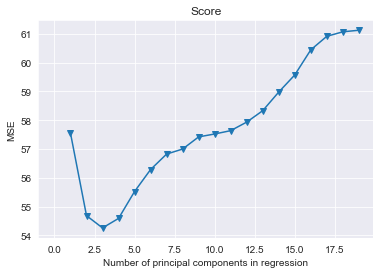

In [130]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [131]:
regr2 = RandomForestRegressor(max_features=10, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

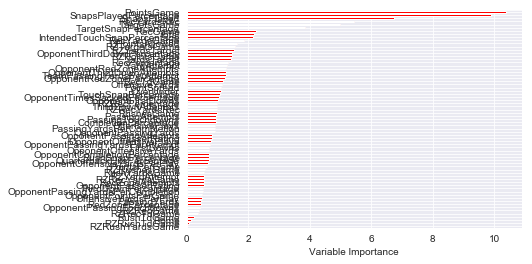

In [132]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [133]:
TE = pd.read_csv('TE/TE.csv')
TE.describe()

,Rank,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.0,777.000000,777.000000,777.000000,777.000000
mean,323.778636,4.819820,2.377091,1.583012,44.890476,18.544402,0.135135,10.039897,5.305148,6.982754,0.009009,0.020592,0.020592,0.0,0.014157,0.010296,4.318533,4.318533
std,153.424559,2.566832,2.764025,1.988658,41.359481,26.343261,0.367513,12.142929,6.471332,7.951771,0.094548,0.459256,0.459256,0.0,0.118214,0.101011,6.029478,6.029478
min,1.000000,1.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,-5.000000,-2.500000,-5.000000,0.000000,-3.000000,-3.000000,0.0,0.000000,0.000000,-0.300000,-0.300000
25%,195.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,388.000000,5.000000,1.000000,1.000000,50.000000,8.000000,0.000000,7.000000,4.000000,5.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.900000,1.900000
75%,461.000000,7.000000,4.000000,2.000000,85.700000,26.000000,0.000000,17.000000,8.500000,12.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.600000,6.600000
max,777.000000,9.000000,15.000000,11.000000,100.000000,180.000000,2.000000,82.000000,44.000000,49.000000,1.000000,10.000000,10.000000,0.0,1.000000,1.000000,34.500000,34.500000


In [134]:
TE = TE.set_index(['Name', 'Team'])
TE.head()

,,Rank,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,,,,,
Eric Ebron,IND,1,TE,5,NE,15,9,60.0,105,2,28,7.0,11.7,0,0,0,0,0,0,34.5,34.5
Jared Cook,OAK,2,TE,4,CLE,13,8,61.5,110,2,24,8.5,13.8,0,0,0,0,0,0,34.0,34.0
Travis Kelce,KC,3,TE,2,PIT,10,7,70.0,109,2,31,10.9,15.6,0,0,0,0,0,0,32.9,32.9
Trey Burton,CHI,4,TE,7,NE,11,9,81.8,126,1,22,11.5,14.0,0,0,0,0,0,0,30.6,30.6
Jared Cook,OAK,5,TE,1,LAR,12,9,75.0,180,0,45,15.0,20.0,0,0,0,0,0,0,30.0,30.0


In [135]:
TEscore = pd.DataFrame()
TEscore = TE.query('Week == 2')
TE2 = TE[TE.Week < 2]
TE2 = TE2.groupby(['Name', 'Team']).mean()
TE2 = TE2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw2 = pd.DataFrame()
TEw2['Opponent'] = TEscore.Opponent
TEw2['Score'] = TEscore.FantasyPointsDraftKings
TEw2['Week'] = TEscore.Week
TEw2 = TEw2.join(TE2)
TEw2 = TEw2.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 3')
TE3 = TE[TE.Week < 3]
TE3 = TE3.groupby(['Name', 'Team']).mean()
TE3 = TE3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw3 = pd.DataFrame()
TEw3['Opponent'] = TEscore.Opponent
TEw3['Score'] = TEscore.FantasyPointsDraftKings
TEw3['Week'] = TEscore.Week
TEw3 = TEw3.join(TE3)
TEw3 = TEw3.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 4')
TE4 = TE[TE.Week < 4]
TE4 = TE4.groupby(['Name', 'Team']).mean()
TE4 = TE4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw4 = pd.DataFrame()
TEw4['Opponent'] = TEscore.Opponent
TEw4['Score'] = TEscore.FantasyPointsDraftKings
TEw4['Week'] = TEscore.Week
TEw4 = TEw4.join(TE4)
TEw4 = TEw4.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 5')
TE5 = TE[TE.Week < 5]
TE5 = TE5.groupby(['Name', 'Team']).mean()
TE5 = TE5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw5 = pd.DataFrame()
TEw5['Opponent'] = TEscore.Opponent
TEw5['Score'] = TEscore.FantasyPointsDraftKings
TEw5['Week'] = TEscore.Week
TEw5 = TEw5.join(TE5)
TEw5 = TEw5.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 6')
TE6 = TE[TE.Week < 6]
TE6 = TE6.groupby(['Name', 'Team']).mean()
TE6 = TE6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw6 = pd.DataFrame()
TEw6['Opponent'] = TEscore.Opponent
TEw6['Score'] = TEscore.FantasyPointsDraftKings
TEw6['Week'] = TEscore.Week
TEw6 = TEw6.join(TE6)
TEw6 = TEw6.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 7')
TE7 = TE[TE.Week < 7]
TE7 = TE7.groupby(['Name', 'Team']).mean()
TE7 = TE7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw7 = pd.DataFrame()
TEw7['Opponent'] = TEscore.Opponent
TEw7['Score'] = TEscore.FantasyPointsDraftKings
TEw7['Week'] = TEscore.Week
TEw7 = TEw7.join(TE7)
TEw7 = TEw7.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 8')
TE8 = TE[TE.Week < 8]
TE8 = TE8.groupby(['Name', 'Team']).mean()
TE8 = TE8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw8 = pd.DataFrame()
TEw8['Opponent'] = TEscore.Opponent
TEw8['Score'] = TEscore.FantasyPointsDraftKings
TEw8['Week'] = TEscore.Week
TEw8 = TEw8.join(TE8)
TEw8 = TEw8.reset_index()

TEscore = pd.DataFrame()
TEscore = TE.query('Week == 9')
TE9 = TE[TE.Week < 9]
TE9 = TE9.groupby(['Name', 'Team']).mean()
TE9 = TE9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEw9 = pd.DataFrame()
TEw9['Opponent'] = TEscore.Opponent
TEw9['Score'] = TEscore.FantasyPointsDraftKings
TEw9['Week'] = TEscore.Week
TEw9 = TEw9.join(TE9)
TEw9 = TEw9.reset_index()



In [136]:
TEws = TEw2.append(TEw3, ignore_index=True, sort=False).append(TEw4, ignore_index=True, sort=False)\
.append(TEw5, ignore_index=True, sort=False).append(TEw6, ignore_index=True, sort=False)\
.append(TEw7, ignore_index=True, sort=False).append(TEw8, ignore_index=True, sort=False)\
.append(TEw9, ignore_index=True, sort=False)
TEws = TEws.dropna().drop_duplicates()
TEws.describe()

,Score,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.0,660.000000,660.000000,660.000000
mean,4.484848,5.369697,2.348292,1.538710,45.843160,18.454380,0.107426,10.261800,5.380158,7.112354,0.007100,0.023525,0.023525,0.0,0.015915,0.010712,4.116650
std,6.143073,2.275353,2.372366,1.627051,32.775184,22.271151,0.204434,9.668388,4.579741,5.821928,0.047776,0.220560,0.220560,0.0,0.089142,0.072909,4.759975
min,-0.300000,2.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-0.500000,-1.000000,0.000000,-0.166667,-0.166667,0.0,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.571429,0.200000,12.500000,1.500000,0.000000,1.482143,0.787500,1.248214,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.375000
50%,2.000000,5.000000,1.600000,1.000000,50.000000,11.250000,0.000000,9.000000,5.300000,7.380000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.558571
75%,7.300000,7.000000,3.500000,2.333333,70.000000,24.875000,0.166667,15.500000,8.256250,10.833333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,5.867500
max,34.500000,9.000000,12.000000,9.000000,100.000000,180.000000,1.000000,66.000000,27.000000,35.000000,0.500000,3.500000,3.500000,0.0,1.000000,1.000000,30.000000


In [137]:
TEavg = pd.DataFrame()
TEavg['Name'] = TEws['Name']
TEavg['Week'] = TEws['Week']
TEavg['Team'] = TEws['Team']
TEavg['Opponent'] = TEws['Opponent']
TEavg['TargetsGame'] = TEws['ReceivingTargets']
TEavg['RecGame'] = TEws['Receptions']
TEavg['RecPercentage'] = TEws['ReceptionPercentage']
TEavg['RecYardsGame'] = TEws['ReceivingYards']
TEavg['RecTdGame'] = TEws['ReceivingTouchdowns']
TEavg['YardsTarget'] = TEws['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TEws['ReceivingYardsPerReception']
TEavg['RushesGame'] = TEws['RushingAttempts']
TEavg['RushYardsGame'] = TEws['RushingYards']
TEavg['YardAttempt'] = TEws['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TEws['RushingTouchdowns']
TEavg['PointsGame'] = TEws['FantasyPointsPerGameDraftKings']
TEavg['Score'] = TEws['Score']

In [138]:
TERZ = pd.read_csv('TE/TERZ.csv')
TERZ.head()

,Rank,Name,Team,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,...,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
0,1,Jordan Thomas,HOU,TE,8,MIA,3,3,100.0,23,...,7.7,7.7,0,0,0,0,0,0,17.3,17.3
1,2,Travis Kelce,KC,TE,9,CLE,2,2,100.0,24,...,12.0,12.0,0,0,0,0,0,0,16.4,16.4
2,3,Michael Roberts,DET,TE,7,MIA,2,2,100.0,19,...,9.5,9.5,0,0,0,0,0,0,15.9,15.9
3,4,Eric Ebron,IND,TE,5,NE,4,2,50.0,15,...,3.8,7.5,0,0,0,0,0,0,15.5,15.5
4,5,Jared Cook,OAK,TE,4,CLE,2,2,100.0,14,...,7.0,7.0,0,0,0,0,0,0,15.4,15.4


In [139]:
TERZ = TERZ.set_index(['Name', 'Team'])
TERZ.head()

,,Rank,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings,FantasyPointsDraftKings
Name,Team,,,,,,,,,,,,,,,,,,,,
Jordan Thomas,HOU,1,TE,8,MIA,3,3,100.0,23,2,13.0,7.7,7.7,0,0,0,0,0,0,17.3,17.3
Travis Kelce,KC,2,TE,9,CLE,2,2,100.0,24,2,13.0,12.0,12.0,0,0,0,0,0,0,16.4,16.4
Michael Roberts,DET,3,TE,7,MIA,2,2,100.0,19,2,15.0,9.5,9.5,0,0,0,0,0,0,15.9,15.9
Eric Ebron,IND,4,TE,5,NE,4,2,50.0,15,2,14.0,3.8,7.5,0,0,0,0,0,0,15.5,15.5
Jared Cook,OAK,5,TE,4,CLE,2,2,100.0,14,2,7.0,7.0,7.0,0,0,0,0,0,0,15.4,15.4


In [140]:
TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 2')
TERZ2 = TERZ[TERZ.Week < 2]
TERZ2 = TERZ2.groupby(['Name', 'Team']).mean()
TERZ2 = TERZ2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw2 = pd.DataFrame()
TERZw2['Opponent'] = TERZscore.Opponent
TERZw2['Score'] = TERZscore.FantasyPointsDraftKings
TERZw2['Week'] = TERZscore.Week
TERZw2 = TERZw2.join(TERZ2)
TERZw2 = TERZw2.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 3')
TERZ3 = TERZ[TERZ.Week < 3]
TERZ3 = TERZ3.groupby(['Name', 'Team']).mean()
TERZ3 = TERZ3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw3 = pd.DataFrame()
TERZw3['Opponent'] = TERZscore.Opponent
TERZw3['Score'] = TERZscore.FantasyPointsDraftKings
TERZw3['Week'] = TERZscore.Week
TERZw3 = TERZw3.join(TERZ3)
TERZw3 = TERZw3.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 4')
TERZ4 = TERZ[TERZ.Week < 4]
TERZ4 = TERZ4.groupby(['Name', 'Team']).mean()
TERZ4 = TERZ4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw4 = pd.DataFrame()
TERZw4['Opponent'] = TERZscore.Opponent
TERZw4['Score'] = TERZscore.FantasyPointsDraftKings
TERZw4['Week'] = TERZscore.Week
TERZw4 = TERZw4.join(TERZ4)
TERZw4 = TERZw4.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 5')
TERZ5 = TERZ[TERZ.Week < 5]
TERZ5 = TERZ5.groupby(['Name', 'Team']).mean()
TERZ5 = TERZ5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw5 = pd.DataFrame()
TERZw5['Opponent'] = TERZscore.Opponent
TERZw5['Score'] = TERZscore.FantasyPointsDraftKings
TERZw5['Week'] = TERZscore.Week
TERZw5 = TERZw5.join(TERZ5)
TERZw5 = TERZw5.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 6')
TERZ6 = TERZ[TERZ.Week < 6]
TERZ6 = TERZ6.groupby(['Name', 'Team']).mean()
TERZ6 = TERZ6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw6 = pd.DataFrame()
TERZw6['Opponent'] = TERZscore.Opponent
TERZw6['Score'] = TERZscore.FantasyPointsDraftKings
TERZw6['Week'] = TERZscore.Week
TERZw6 = TERZw6.join(TERZ6)
TERZw6 = TERZw6.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 7')
TERZ7 = TERZ[TERZ.Week < 7]
TERZ7 = TERZ7.groupby(['Name', 'Team']).mean()
TERZ7 = TERZ7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw7 = pd.DataFrame()
TERZw7['Opponent'] = TERZscore.Opponent
TERZw7['Score'] = TERZscore.FantasyPointsDraftKings
TERZw7['Week'] = TERZscore.Week
TERZw7 = TERZw7.join(TERZ7)
TERZw7 = TERZw7.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 8')
TERZ8 = TERZ[TERZ.Week < 8]
TERZ8 = TERZ8.groupby(['Name', 'Team']).mean()
TERZ8 = TERZ8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw8 = pd.DataFrame()
TERZw8['Opponent'] = TERZscore.Opponent
TERZw8['Score'] = TERZscore.FantasyPointsDraftKings
TERZw8['Week'] = TERZscore.Week
TERZw8 = TERZw8.join(TERZ8)
TERZw8 = TERZw8.reset_index()

TERZscore = pd.DataFrame()
TERZscore = TERZ.query('Week == 9')
TERZ9 = TERZ[TERZ.Week < 9]
TERZ9 = TERZ9.groupby(['Name', 'Team']).mean()
TERZ9 = TERZ9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TERZw9 = pd.DataFrame()
TERZw9['Opponent'] = TERZscore.Opponent
TERZw9['Score'] = TERZscore.FantasyPointsDraftKings
TERZw9['Week'] = TERZscore.Week
TERZw9 = TERZw9.join(TERZ9)
TERZw9 = TERZw9.reset_index()



In [141]:
TERZws = TERZw2.append(TERZw3, ignore_index=True, sort=False).append(TERZw4, ignore_index=True, sort=False)\
.append(TERZw5, ignore_index=True, sort=False).append(TERZw6, ignore_index=True, sort=False)\
.append(TERZw7, ignore_index=True, sort=False).append(TERZw8, ignore_index=True, sort=False)\
.append(TERZw9, ignore_index=True, sort=False)
TERZws = TERZws.dropna().drop_duplicates()
TERZws.describe()

,Score,Week,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,ReceivingTouchdowns,ReceivingLong,ReceivingYardsPerTarget,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameDraftKings
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.0,351.000000,351.0,351.000000
mean,1.731054,5.900285,0.660121,0.365147,28.383948,2.767660,0.150845,4.737926,2.195588,2.473302,0.005420,0.008194,0.008194,0.0,0.008025,0.0,1.577830
std,3.512000,2.163007,0.497769,0.336458,25.637380,3.060255,0.216685,4.470122,2.525941,2.697057,0.039629,0.076938,0.076938,0.0,0.066258,0.0,1.721043
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.166667,-0.166667,0.0,0.000000,0.0,0.000000
25%,0.000000,4.000000,0.333333,0.125000,5.625000,0.071429,0.000000,0.250000,0.041667,0.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.228571
50%,0.000000,6.000000,0.500000,0.333333,25.000000,2.000000,0.000000,4.000000,1.500000,1.833333,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.150000
75%,1.400000,8.000000,1.000000,0.500000,49.764286,4.309524,0.250000,7.833333,3.267857,3.750000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.291667
max,17.300000,9.000000,3.000000,1.800000,100.000000,15.000000,1.000000,19.000000,15.000000,15.000000,0.500000,1.000000,1.000000,0.0,1.000000,0.0,8.500000


In [142]:
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZws['Name']
TERZavg['Week'] = TERZws['Week'] 
TERZavg['RZTargetsGame'] = TERZws['ReceivingTargets']
TERZavg['RZRecGame'] = TERZws['Receptions']
TERZavg['RZRecPercentage'] = TERZws['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZws['ReceivingYards']
TERZavg['RZRecTdGame'] = TERZws['ReceivingTouchdowns']
TERZavg['RZYardsTarget'] = TERZws['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZws['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZws['RushingAttempts']
TERZavg['RZRushYardsGame'] = TERZws['RushingYards']
TERZavg['RZYardAttempt'] = TERZws['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZws['RushingTouchdowns']
TERZavg['RZPointsGame'] = TERZws['FantasyPointsPerGameDraftKings']

In [143]:
TEsnaps = pd.read_csv('TE/TEsnaps.csv')

TEsnaps = TEsnaps.set_index(['Name', 'Team'])

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 2')
TEsnaps2 = TEsnaps[TEsnaps.Week < 2]
TEsnaps2 = TEsnaps2.groupby(['Name', 'Team']).mean()
TEsnaps2 = TEsnaps2.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw2 = pd.DataFrame()
TEsnapsw2['Opponent'] = TEsnapsscore.Opponent
TEsnapsw2['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw2['Week'] = TEsnapsscore.Week
TEsnapsw2 = TEsnapsw2.join(TEsnaps2)
TEsnapsw2 = TEsnapsw2.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 3')
TEsnaps3 = TEsnaps[TEsnaps.Week < 3]
TEsnaps3 = TEsnaps3.groupby(['Name', 'Team']).mean()
TEsnaps3 = TEsnaps3.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw3 = pd.DataFrame()
TEsnapsw3['Opponent'] = TEsnapsscore.Opponent
TEsnapsw3['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw3['Week'] = TEsnapsscore.Week
TEsnapsw3 = TEsnapsw3.join(TEsnaps3)
TEsnapsw3 = TEsnapsw3.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 4')
TEsnaps4 = TEsnaps[TEsnaps.Week < 4]
TEsnaps4 = TEsnaps4.groupby(['Name', 'Team']).mean()
TEsnaps4 = TEsnaps4.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw4 = pd.DataFrame()
TEsnapsw4['Opponent'] = TEsnapsscore.Opponent
TEsnapsw4['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw4['Week'] = TEsnapsscore.Week
TEsnapsw4 = TEsnapsw4.join(TEsnaps4)
TEsnapsw4 = TEsnapsw4.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 5')
TEsnaps5 = TEsnaps[TEsnaps.Week < 5]
TEsnaps5 = TEsnaps5.groupby(['Name', 'Team']).mean()
TEsnaps5 = TEsnaps5.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw5 = pd.DataFrame()
TEsnapsw5['Opponent'] = TEsnapsscore.Opponent
TEsnapsw5['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw5['Week'] = TEsnapsscore.Week
TEsnapsw5 = TEsnapsw5.join(TEsnaps5)
TEsnapsw5 = TEsnapsw5.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 6')
TEsnaps6 = TEsnaps[TEsnaps.Week < 6]
TEsnaps6 = TEsnaps6.groupby(['Name', 'Team']).mean()
TEsnaps6 = TEsnaps6.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw6 = pd.DataFrame()
TEsnapsw6['Opponent'] = TEsnapsscore.Opponent
TEsnapsw6['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw6['Week'] = TEsnapsscore.Week
TEsnapsw6 = TEsnapsw6.join(TEsnaps6)
TEsnapsw6 = TEsnapsw6.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 7')
TEsnaps7 = TEsnaps[TEsnaps.Week < 7]
TEsnaps7 = TEsnaps7.groupby(['Name', 'Team']).mean()
TEsnaps7 = TEsnaps7.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw7 = pd.DataFrame()
TEsnapsw7['Opponent'] = TEsnapsscore.Opponent
TEsnapsw7['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw7['Week'] = TEsnapsscore.Week
TEsnapsw7 = TEsnapsw7.join(TEsnaps7)
TEsnapsw7 = TEsnapsw7.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 8')
TEsnaps8 = TEsnaps[TEsnaps.Week < 8]
TEsnaps8 = TEsnaps8.groupby(['Name', 'Team']).mean()
TEsnaps8 = TEsnaps8.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw8 = pd.DataFrame()
TEsnapsw8['Opponent'] = TEsnapsscore.Opponent
TEsnapsw8['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw8['Week'] = TEsnapsscore.Week
TEsnapsw8 = TEsnapsw8.join(TEsnaps8)
TEsnapsw8 = TEsnapsw8.reset_index()

TEsnapsscore = pd.DataFrame()
TEsnapsscore = TEsnaps.query('Week == 9')
TEsnaps9 = TEsnaps[TEsnaps.Week < 9]
TEsnaps9 = TEsnaps9.groupby(['Name', 'Team']).mean()
TEsnaps9 = TEsnaps9.drop(['FantasyPointsDraftKings', 'Rank', 'Week'], axis=1)
TEsnapsw9 = pd.DataFrame()
TEsnapsw9['Opponent'] = TEsnapsscore.Opponent
TEsnapsw9['Score'] = TEsnapsscore.FantasyPointsDraftKings
TEsnapsw9['Week'] = TEsnapsscore.Week
TEsnapsw9 = TEsnapsw9.join(TEsnaps9)
TEsnapsw9 = TEsnapsw9.reset_index()



TEsnapsws = TEsnapsw2.append(TEsnapsw3, ignore_index=True, sort=False).append(TEsnapsw4, ignore_index=True, sort=False)\
.append(TEsnapsw5, ignore_index=True, sort=False).append(TEsnapsw6, ignore_index=True, sort=False)\
.append(TEsnapsw7, ignore_index=True, sort=False).append(TEsnapsw8, ignore_index=True, sort=False)\
.append(TEsnapsw9, ignore_index=True, sort=False)
TEsnapsws = TEsnapsws.dropna().drop_duplicates()
TEsnapsws.describe()

,Score,Week,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,4.484848,5.369697,30.039888,44.148578,0.022663,7.273954,4.283089,7.296673,11.368864
std,6.143073,2.275353,18.524324,26.783240,0.177243,6.756663,3.546795,6.763327,11.266355
min,-0.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,16.187500,23.804167,0.000000,3.162946,1.255357,3.162946,2.419167
50%,2.000000,5.000000,26.000000,37.345833,0.000000,6.445238,3.943750,6.445238,9.187500
75%,7.300000,7.000000,43.221429,65.185000,0.000000,10.487500,6.761607,10.512500,16.773571
max,34.500000,9.000000,78.000000,100.000000,2.800000,100.000000,21.400000,100.000000,75.200000


In [144]:
TEsnaps = TEsnapsws.drop(['Team', 'Opponent', 'Score', 'FantasyPointSnapPercentageDraftKings'], axis=1)

In [145]:
Defense2 = Defense[Defense.Week < 2]
Defense2 = Defense2.groupby('Team').mean()
Defense2 = Defense2.drop('Week', axis = 1)
Defense2 = Defense2.reset_index()
TEd2 = pd.DataFrame()
TEd2['Opponent'] = Defense2['Team']
TEd2['Week'] = 2
TEd2['DPointsAllowed'] = Defense2.DraftKingsTightEndFantasyPointsAllowedAverage

Defense3 = Defense[Defense.Week < 3]
Defense3 = Defense3.groupby('Team').mean()
Defense3 = Defense3.drop('Week', axis = 1)
Defense3 = Defense3.reset_index()
TEd3 = pd.DataFrame()
TEd3['Opponent'] = Defense3['Team']
TEd3['Week'] = 3
TEd3['DPointsAllowed'] = Defense3.DraftKingsTightEndFantasyPointsAllowedAverage

Defense4 = Defense[Defense.Week < 4]
Defense4 = Defense4.groupby('Team').mean()
Defense4 = Defense4.drop('Week', axis = 1)
Defense4 = Defense4.reset_index()
TEd4 = pd.DataFrame()
TEd4['Opponent'] = Defense4['Team']
TEd4['Week'] = 4
TEd4['DPointsAllowed'] = Defense4.DraftKingsTightEndFantasyPointsAllowedAverage

Defense5 = Defense[Defense.Week < 5]
Defense5 = Defense5.groupby('Team').mean()
Defense5 = Defense5.drop('Week', axis = 1)
Defense5 = Defense5.reset_index()
TEd5 = pd.DataFrame()
TEd5['Opponent'] = Defense5['Team']
TEd5['Week'] = 5
TEd5['DPointsAllowed'] = Defense5.DraftKingsTightEndFantasyPointsAllowedAverage

Defense6 = Defense[Defense.Week < 6]
Defense6 = Defense6.groupby('Team').mean()
Defense6 = Defense6.drop('Week', axis = 1)
Defense6 = Defense6.reset_index()
TEd6 = pd.DataFrame()
TEd6['Opponent'] = Defense6['Team']
TEd6['Week'] = 6
TEd6['DPointsAllowed'] = Defense6.DraftKingsTightEndFantasyPointsAllowedAverage

Defense7 = Defense[Defense.Week < 7]
Defense7 = Defense7.groupby('Team').mean()
Defense7 = Defense7.drop('Week', axis = 1)
Defense7 = Defense7.reset_index()
TEd7 = pd.DataFrame()
TEd7['Opponent'] = Defense7['Team']
TEd7['Week'] = 7
TEd7['DPointsAllowed'] = Defense7.DraftKingsTightEndFantasyPointsAllowedAverage

Defense8 = Defense[Defense.Week < 8]
Defense8 = Defense8.groupby('Team').mean()
Defense8 = Defense8.drop('Week', axis = 1)
Defense8 = Defense8.reset_index()
TEd8 = pd.DataFrame()
TEd8['Opponent'] = Defense8['Team']
TEd8['Week'] = 8
TEd8['DPointsAllowed'] = Defense8.DraftKingsTightEndFantasyPointsAllowedAverage

Defense9 = Defense[Defense.Week < 9]
Defense9 = Defense9.groupby('Team').mean()
Defense9 = Defense9.drop('Week', axis = 1)
Defense9 = Defense9.reset_index()
TEd9 = pd.DataFrame()
TEd9['Opponent'] = Defense9['Team']
TEd9['Week'] = 9
TEd9['DPointsAllowed'] = Defense9.DraftKingsTightEndFantasyPointsAllowedAverage



In [146]:
TEds = TEd2.append(TEd3, ignore_index=True, sort=False).append(TEd4, ignore_index=True, sort=False)\
.append(TEd5, ignore_index=True, sort=False).append(TEd6, ignore_index=True, sort=False)\
.append(TEd7, ignore_index=True, sort=False).append(TEd8, ignore_index=True, sort=False)\
.append(TEd9, ignore_index=True, sort=False)


In [147]:
TEavg = TEavg.set_index(['Name', 'Week'])
TERZavg = TERZavg.set_index(['Name', 'Week'])
TEs = TEavg.join(TERZavg, lsuffix='avg', rsuffix='rzavg')
TEs = TEs.drop_duplicates().dropna()
TEs.describe()


,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.0,351.000000
mean,3.432241,2.249094,57.735503,26.589666,0.183303,6.730033,9.186358,0.010975,0.044234,0.044234,...,28.383948,2.767660,0.150845,2.195588,2.473302,0.005420,0.008194,0.008194,0.0,1.577830
std,2.449160,1.682843,24.342971,22.189574,0.242882,3.488444,4.642332,0.056923,0.301125,0.301125,...,25.637380,3.060255,0.216685,2.525941,2.697057,0.039629,0.076938,0.076938,0.0,1.721043
min,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.166667,-0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.166667,-0.166667,0.0,0.000000
25%,1.500000,1.000000,45.291667,10.535714,0.000000,4.783333,6.666667,0.000000,0.000000,0.000000,...,5.625000,0.071429,0.000000,0.041667,0.071429,0.000000,0.000000,0.000000,0.0,0.228571
50%,3.000000,2.000000,60.857143,20.333333,0.142857,6.700000,9.200000,0.000000,0.000000,0.000000,...,25.000000,2.000000,0.000000,1.500000,1.833333,0.000000,0.000000,0.000000,0.0,1.150000
75%,5.000000,3.125000,73.464286,38.875000,0.285714,8.853333,11.558333,0.000000,0.000000,0.000000,...,49.764286,4.309524,0.250000,3.267857,3.750000,0.000000,0.000000,0.000000,0.0,2.291667
max,11.750000,8.200000,100.000000,114.500000,1.000000,27.000000,35.000000,0.500000,3.500000,3.500000,...,100.000000,15.000000,1.000000,15.000000,15.000000,0.500000,1.000000,1.000000,0.0,8.500000


In [148]:
TEs = TEs.reset_index()

In [149]:
TEsnaps = TEsnaps.set_index(['Name', 'Week'])
TEs = TEs.set_index(['Name', 'Week'])
TEs = TEs.join(TEsnaps, lsuffix='avg', rsuffix='rzavg')
TEs = TEs.drop_duplicates().dropna()
TEs.describe()


,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3.432241,2.249094,57.735503,26.589666,0.183303,6.730033,9.186358,0.010975,0.044234,0.044234,...,0.008194,0.008194,0.0,1.577830,36.995659,54.445219,0.029320,8.994867,5.702435,9.024528
std,2.449160,1.682843,24.342971,22.189574,0.242882,3.488444,4.642332,0.056923,0.301125,0.301125,...,0.076938,0.076938,0.0,1.721043,16.872117,24.770250,0.164015,4.471238,3.100281,4.473083
min,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.166667,-0.166667,...,-0.166667,-0.166667,0.0,0.000000,4.200000,5.420000,0.000000,0.757143,0.000000,0.757143
25%,1.500000,1.000000,45.291667,10.535714,0.000000,4.783333,6.666667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.228571,22.575000,33.900000,0.000000,5.875000,3.491667,5.875000
50%,3.000000,2.000000,60.857143,20.333333,0.142857,6.700000,9.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.150000,37.166667,55.475000,0.000000,8.440000,5.566667,8.550000
75%,5.000000,3.125000,73.464286,38.875000,0.285714,8.853333,11.558333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,2.291667,51.000000,77.757143,0.000000,12.146667,7.620000,12.146667
max,11.750000,8.200000,100.000000,114.500000,1.000000,27.000000,35.000000,0.500000,3.500000,3.500000,...,1.000000,1.000000,0.0,8.500000,77.000000,100.000000,1.700000,40.000000,17.966667,40.000000


In [150]:
TEs = TEs.reset_index()

In [151]:
TEtest = TEs.set_index(['Week', 'Opponent'])
TEdtest = TEds.set_index(['Week', 'Opponent'])
TEho = TEtest.join(TEdtest, lsuffix='norm', rsuffix='d')
TEho = TEho.reset_index()
TEhope = TEho.dropna().drop_duplicates()
TEhope.describe()


,Week,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPlayed,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,DPointsAllowed
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,5.900285,3.432241,2.249094,57.735503,26.589666,0.183303,6.730033,9.186358,0.010975,0.044234,...,0.008194,0.0,1.577830,36.995659,54.445219,0.029320,8.994867,5.702435,9.024528,12.471884
std,2.163007,2.449160,1.682843,24.342971,22.189574,0.242882,3.488444,4.642332,0.056923,0.301125,...,0.076938,0.0,1.721043,16.872117,24.770250,0.164015,4.471238,3.100281,4.473083,4.539375
min,2.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.166667,...,-0.166667,0.0,0.000000,4.200000,5.420000,0.000000,0.757143,0.000000,0.757143,1.700000
25%,4.000000,1.500000,1.000000,45.291667,10.535714,0.000000,4.783333,6.666667,0.000000,0.000000,...,0.000000,0.0,0.228571,22.575000,33.900000,0.000000,5.875000,3.491667,5.875000,9.683333
50%,6.000000,3.000000,2.000000,60.857143,20.333333,0.142857,6.700000,9.200000,0.000000,0.000000,...,0.000000,0.0,1.150000,37.166667,55.475000,0.000000,8.440000,5.566667,8.550000,11.850000
75%,8.000000,5.000000,3.125000,73.464286,38.875000,0.285714,8.853333,11.558333,0.000000,0.000000,...,0.000000,0.0,2.291667,51.000000,77.757143,0.000000,12.146667,7.620000,12.146667,15.280000
max,9.000000,11.750000,8.200000,100.000000,114.500000,1.000000,27.000000,35.000000,0.500000,3.500000,...,1.000000,0.0,8.500000,77.000000,100.000000,1.700000,40.000000,17.966667,40.000000,34.000000


In [152]:
TEhope1 = TEhope.set_index(['Week', 'Team'])
Vegashope = Vegas.set_index(['Week', 'Team'])
TEfi = TEhope1.join(Vegashope)

In [153]:
TEs = TEfi.reset_index()

In [154]:
TEs = TEs.set_index('Team')
TEs = TEs.join(WROffense)
TEs.columns

Index(['Week', 'Opponent', 'Name', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec', 'RushesGame',
       'RushYardsGame', 'YardAttempt', 'RushTdGame', 'PointsGame', 'Score',
       'RZTargetsGame', 'RZRecGame', 'RZRecPercentage', 'RZRecYardsGame',
       'RZRecTdGame', 'RZYardsTarget', 'RZRecYardsRec', 'RZRushesGame',
       'RZRushYardsGame', 'RZYardAttempt', 'RZRushTdGame', 'RZPointsGame',
       'SnapsPlayed', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'PassingAttempts', 'CompletionPercentage',
       'PassingYards', 'TeamPassingYardsPerAttempt',
       'PassingYardsP

In [155]:
TEs = TEs.reset_index()

In [156]:
TEs = TEs.set_index('Opponent')
TEs = TEs.join(QBDef)
TEs = TEs.reset_index()

In [157]:
TEs = TEs.drop(['Opponent', 'Team', 'Week'], axis=1)

In [158]:
TEtrain = TEs.dropna().drop_duplicates()
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3.432241,2.249094,57.735503,26.589666,0.183303,6.730033,9.186358,0.010975,0.044234,0.044234,...,59.435328,6.682051,15.241311,328.353276,65.209687,249.928712,7.085185,10.849858,1.775261,93.105413
std,2.449160,1.682843,24.342971,22.189574,0.242882,3.488444,4.642332,0.056923,0.301125,0.301125,...,12.146562,1.626703,2.359486,38.669597,3.301137,28.754506,0.645120,0.758113,0.384523,9.154718
min,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.166667,-0.166667,...,34.800000,3.000000,10.500000,252.000000,59.600000,200.454774,5.700000,9.400000,1.222222,78.000000
25%,1.500000,1.000000,45.291667,10.535714,0.000000,4.783333,6.666667,0.000000,0.000000,0.000000,...,51.400000,5.700000,13.700000,302.000000,63.000000,231.888889,6.800000,10.350000,1.400000,87.000000
50%,3.000000,2.000000,60.857143,20.333333,0.142857,6.700000,9.200000,0.000000,0.000000,0.000000,...,58.600000,6.800000,15.400000,325.000000,64.500000,242.915217,7.000000,10.900000,1.700000,91.000000
75%,5.000000,3.125000,73.464286,38.875000,0.285714,8.853333,11.558333,0.000000,0.000000,0.000000,...,67.900000,7.800000,16.600000,350.000000,67.100000,269.493714,7.200000,11.200000,2.109091,97.000000
max,11.750000,8.200000,100.000000,114.500000,1.000000,27.000000,35.000000,0.500000,3.500000,3.500000,...,87.500000,9.500000,22.300000,419.000000,73.600000,313.333333,8.900000,13.600000,2.552921,121.000000


In [159]:
TEtrain.to_csv('2015TE.csv')

In [160]:
X_train = TEtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = TEtrain.Score

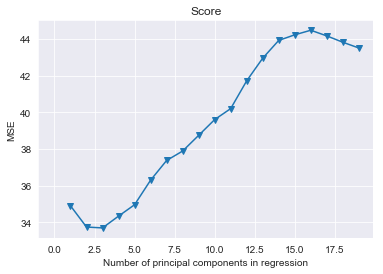

In [161]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [162]:
regr2 = RandomForestRegressor(max_features=10, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

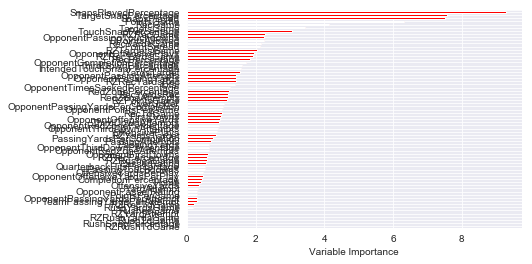

In [163]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None